In [62]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import glob
%matplotlib inline

## Camera Calibration

### 1. Briefly state how you computed the camera matrix and distortion coefficients. 


In this project, we will use the image captured by the camera to mesure the lateral position of the vehicle as a function of the lane as well as mesuring the lane curvatures. Unfortunately, images captured by cameras don't come without distorsions.
The most [common](https://en.wikipedia.org/wiki/Distortion_(optics) distorsion is the radial distorsion: the image sensed tend to be curve lines around the edges (radial distorsion) or distorts angles. 
So, before we can use the camera to measure space, we need to compensate distorsions induced by camera lenses. 

The process of calibrating the camera allows us to build a mathematical model of the optical distorsions.
We can then use this model to correct the distorsions.

First, we will compute the camera calibration matrix and distortion coefficients given a set of chessboard images. 
Then, we will store the camera calibration matrix and distortion coefficients in order to rectify all images recorded.

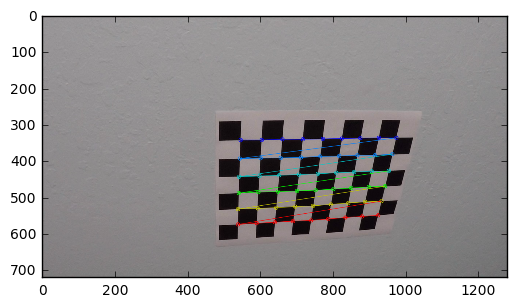

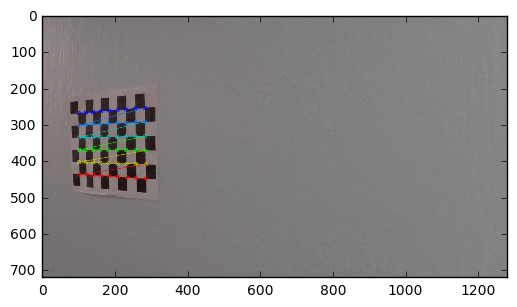

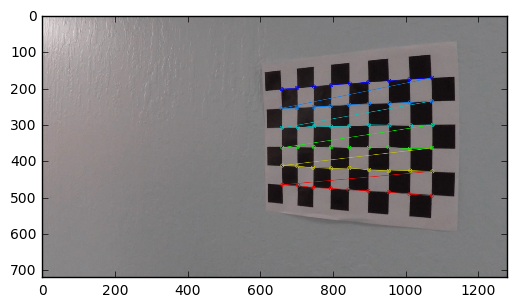

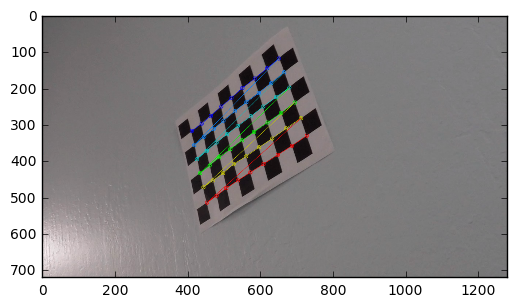

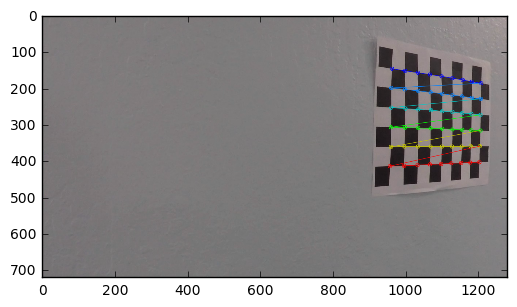

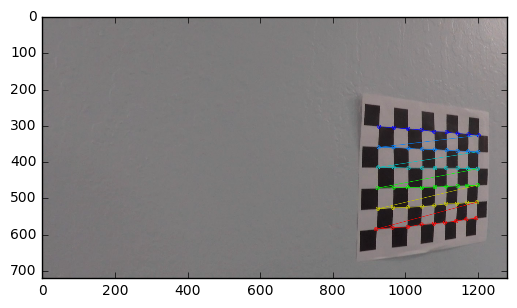

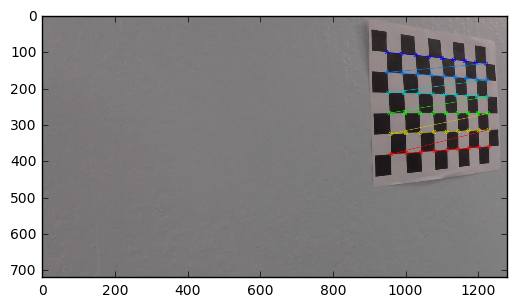

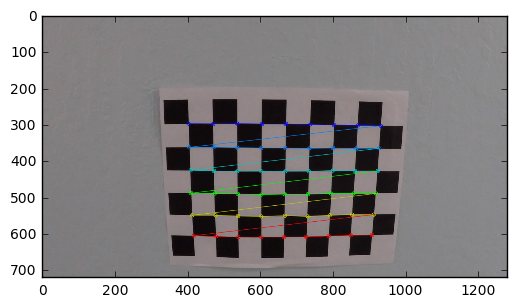

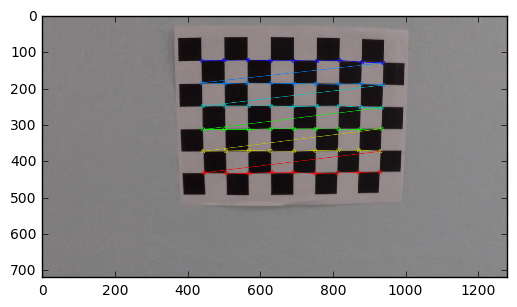

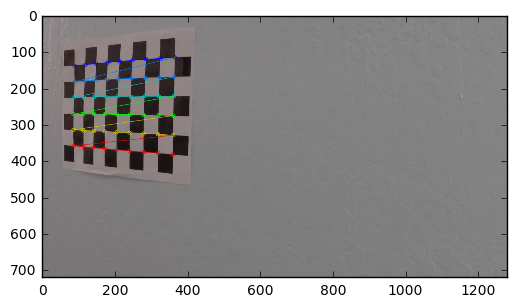

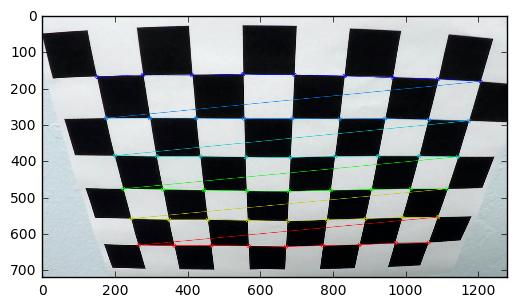

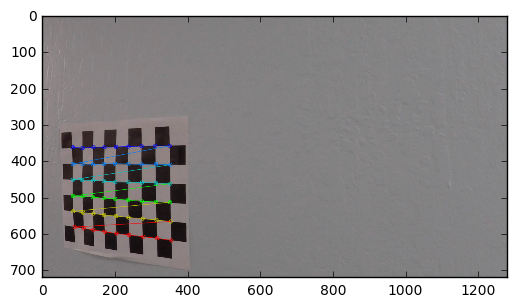

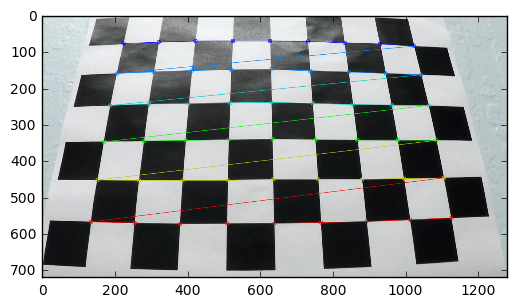

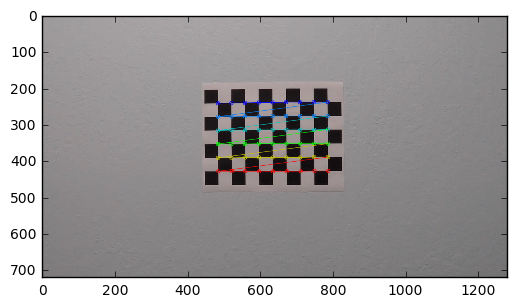

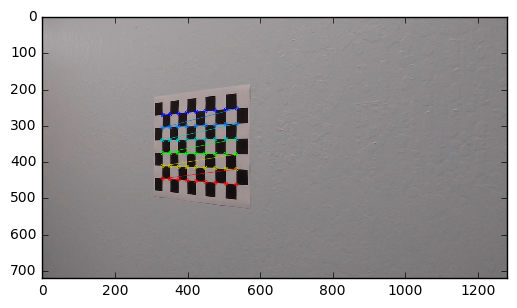

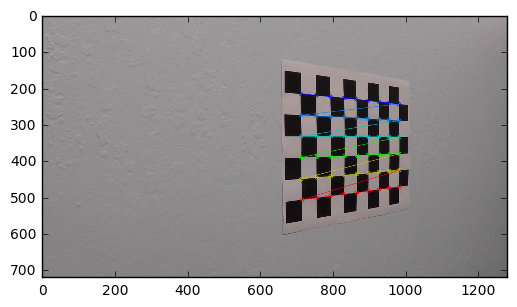

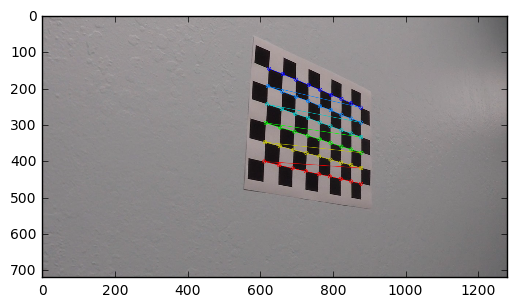

In [63]:

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('./camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        plt.imshow(img)
        plt.show()
        

ret, cameraMatrix, distCoeffs, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[0:2], None, None)
def cal_undistort(img, cameraMatrix, distCoeffs):
    # Use cv2.calibrateCamera() and cv2.undistort()
    undist = cv2.undistort(img, cameraMatrix, distCoeffs, None, cameraMatrix)
    return undist



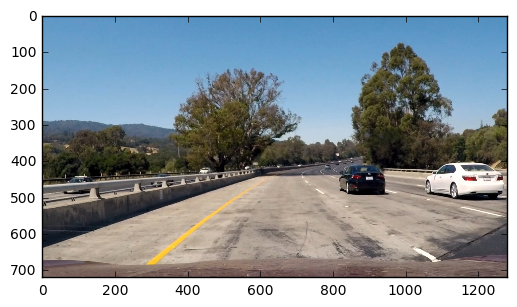

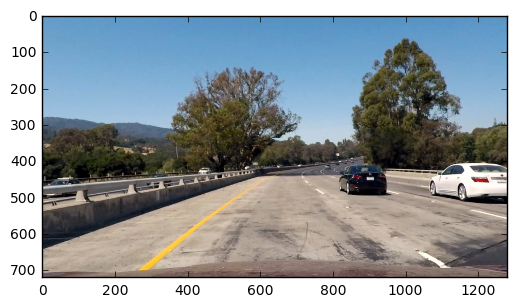

In [64]:
example_image = plt.imread('./test_images/test1.jpg')
plt.imshow(example_image)
plt.show()
img_undist = cal_undistort(example_image, cameraMatrix, distCoeffs)
plt.imshow(img_undist)
plt.show()

#### 2. Creating a thresholded binary image.

In [65]:
class WidgetCom:
    """ Stores data for handling with interactive widget """
    value = dict()
WidgetCom.value['mutex'] = False
WidgetCom.value['image'] = img_undist
WidgetCom.value['H_chan_min'] = 10
WidgetCom.value['H_chan_max'] = 512
WidgetCom.value['S_chan_min'] = 60
WidgetCom.value['V_chan_min'] = 80
WidgetCom.value['gray_min'] = 195
WidgetCom.value['sobel_angle_min'] = -15.0
WidgetCom.value['sobel_angle_max'] = 15.0
WidgetCom.value['sobel_mag'] = 70
WidgetCom.value['clipLimit'] = 2 # CLAHE histogram
WidgetCom.value['tileGridSize'] = 8 # CLAHE histogram
WidgetCom.value['sobel_mag'] = 70
WidgetCom.value['image'] = img_undist

# Hmin : 17
# Hmax : 512
# Smin : 88
# Vmin : 1
# gray : 195
# tileGridSize: 8
# clipLimit : 2
# sobel mag : 80

In [66]:
# http://ipywidgets.readthedocs.io/en/latest/examples/Widget%20Events.html
# Using widget to help calibrating computer vision parameters
    
def handle_slider_h_chan_min_change(change):
    WidgetCom.value['H_chan_min'] = change.new
    display_image()    
        
def handle_slider_h_chan_max_change(change):
    WidgetCom.value['H_chan_max'] = change.new
    display_image()
    
def handle_slider_s_chan_change(change):
    WidgetCom.value['S_chan_min'] = change.new
    display_image()
    
def handle_slider_v_chan_change(change):
    WidgetCom.value['V_chan_min'] = change.new
    display_image()
    
def handle_slider_gray_min_change(change):
    WidgetCom.value['gray_min'] = change.new
    display_image()
    
def handle_slider_sobel_angle_min_change(change):
    WidgetCom.value['sobel_angle_min'] = change.new
    display_image()
    
def handle_slider_sobel_angle_max_change(change):
    WidgetCom.value['sobel_angle_max'] = change.new
    display_image()
    
def handle_slider_sobel_mag_change(change):
    WidgetCom.value['sobel_mag'] = change.new
    display_image()
    
def handle_slider_clipLimit_clahe_change(change):
    WidgetCom.value['clipLimit'] = change.new
    display_image()
    
def handle_slider_tileGridSize_clahe_change(change):
    WidgetCom.value['tileGridSize'] = change.new
    display_image()
    
from ipywidgets import widgets
slider_h_min_chan = widgets.IntSlider(min=0, max=128, value=WidgetCom.value['H_chan_min'], description='H min')
slider_h_max_chan = widgets.FloatSlider(min=0, max=512, value=WidgetCom.value['H_chan_max'], description='H max')
slider_s_chan = widgets.IntSlider(min=0, max=255, value=WidgetCom.value['S_chan_min'], description='S min')
slider_v_chan = widgets.IntSlider(min=0, max=255, value=WidgetCom.value['V_chan_min'], description='V min')
slider_gray_min = widgets.IntSlider(min=0, max=255, value=WidgetCom.value['gray_min'], description='gray')
slider_sobel_angle_min = widgets.FloatSlider(min=-45, max=45, value=WidgetCom.value['sobel_angle_min'], description='sobel angle min')
slider_sobel_angle_max = widgets.FloatSlider(min=-45, max=45, value=WidgetCom.value['sobel_angle_max'], description='sobel angle max')
slider_sobel_mag = widgets.FloatSlider(min=0.1, max=100, value=WidgetCom.value['sobel_mag'], description='sobel mag')
slider_tileGridSize_clahe_mag = widgets.IntSlider(min=8, max=512, value=WidgetCom.value['tileGridSize'], description='tileGridSize')
slider_clipLimit_clahe_mag = widgets.IntSlider(min=1, max=256.0, value=WidgetCom.value['clipLimit'], description='clipLimit')

slider_h_min_chan.observe(handle_slider_h_chan_min_change, names='value')
slider_h_max_chan.observe(handle_slider_h_chan_max_change, names='value')
slider_s_chan.observe(handle_slider_s_chan_change, names='value')
slider_v_chan.observe(handle_slider_v_chan_change, names='value')
slider_gray_min.observe(handle_slider_gray_min_change, names='value')
slider_sobel_angle_min.observe(handle_slider_sobel_angle_min_change, names='value')
slider_sobel_angle_max.observe(handle_slider_sobel_angle_max_change, names='value')
slider_sobel_mag.observe(handle_slider_sobel_mag_change, names='value')
slider_tileGridSize_clahe_mag.observe(handle_slider_tileGridSize_clahe_change, names='value')
slider_clipLimit_clahe_mag.observe(handle_slider_tileGridSize_clahe_change, names='value')

In [118]:
# Let's get the yellow in the image
def segment_image(img_undist, S_chan_min,V_chan_min, gray_min):
    # Let's perform some histogram based brightness compensation
    
    V = cv2.cvtColor(img_undist, cv2.COLOR_RGB2HSV)[:,:,2]
    clahe = cv2.createCLAHE(clipLimit=WidgetCom.value['clipLimit'], 
                            tileGridSize=(WidgetCom.value['tileGridSize'] ,WidgetCom.value['tileGridSize'] ))
    gray_clahe = clahe.apply(V)
    gray_mean = np.mean(gray_clahe)
    gray_min = gray_min + ((gray_mean - 80)*2/3) #Offset depending on global brightness of image
    mask = np.uint8(gray_clahe>gray_min)*255
    
    #plt.imshow(np.hstack((gray,gray_clahe)), cmap='gray')
    #plt.show()
    
    #img_yuv[:,:,0] = gray_clahe
    #img = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)
    
    im_white = cv2.bitwise_and(V, V, mask= mask)
    
    """
    # Look for yellow, for color segmentation
    lower_yellow = np.array([WidgetCom.value['H_chan_min'], S_chan_min, V_chan_min], np.uint8)
    upper_yellow = np.array([WidgetCom.value['H_chan_max'], 255, 255], np.uint8)

    # Calculate mask for color segmentation
    img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    mask = cv2.inRange(img_hsv, lower_yellow, upper_yellow)
    im_yellow = cv2.bitwise_and(img,img, mask= mask)
    
    #im_white = cv2.bitwise_and(im_white,im_white, mask= gray_slice)
    return np.clip(im_white.astype('uint16')//2+ im_yellow.astype('uint16')//2, 0,255).astype('uint8')"""
    return np.dstack((im_white, im_white, im_white))

def sobel_angle_image(img, thresh_min, thresh_max, mag_thresh):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    
    # Calculate the gradient magnitude
    gradmag = np.sqrt(sobelx**2 + sobely**2)
    # Rescale to 8 bit
    scale_factor = np.max(gradmag)/255 
    gradmag = (gradmag/scale_factor).astype(np.uint8) 
    # Create a binary image of ones where threshold is met, zeros otherwise
    mask_mag = np.zeros_like(gradmag).astype('uint8')
    mask_mag[gradmag >= mag_thresh] = 1
    mask_mag[gradmag >= WidgetCom.value['H_chan_max'] ] = 0
    
    # Take the absolute value of the gradient direction, 
    # apply a threshold, and create a binary image result
    absgraddir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    absgraddir = np.float32(absgraddir)*180.0/np.pi
    #binary_output =  np.zeros_like(absgraddir).astype('uint8')
    direction_im = np.bitwise_and((absgraddir>thresh_min).astype('uint8'),
                                   (absgraddir<thresh_max).astype('uint8')).astype('uint8')
    
    binary_output = cv2.bitwise_and(direction_im,mask_mag, mask=mask_mag)
    return binary_output*1.0



# Let's get the yellow in the image


import time
from IPython import display
def compute_image(image):
    S_chan_min = WidgetCom.value['S_chan_min']
    V_chan_min = WidgetCom.value['V_chan_min']
    gray_min =   WidgetCom.value['gray_min']
    thresh_min = WidgetCom.value['sobel_angle_min']
    thresh_max = WidgetCom.value['sobel_angle_max']
    mag_thresh = WidgetCom.value['sobel_mag']
    img = segment_image(image, S_chan_min, V_chan_min, gray_min)
    edge_img = sobel_angle_image(img, thresh_min, thresh_max, mag_thresh)
    return img, edge_img
        
def display_image():
    if WidgetCom.value['mutex'] == False:
        WidgetCom.value['mutex'] = True
        
        img, edge_img = compute_image(WidgetCom.value['image'])

        fig = plt.figure(figsize=(8, 5))
        ax = fig.add_subplot(2, 3, 1)
        plt.title('Original Image')
        ax.imshow(WidgetCom.value['image'])
        ax = fig.add_subplot(2, 3, 2)
        plt.title('Masked Image')
        ax.imshow(img)
        ax = fig.add_subplot(2, 3, 3)
        ax.imshow(edge_img, cmap='gray')
        plt.title('Edges')
        
        plt.show()
        plt.close(fig)
        display.clear_output(wait=True)
        WidgetCom.value['mutex'] = False
    
    

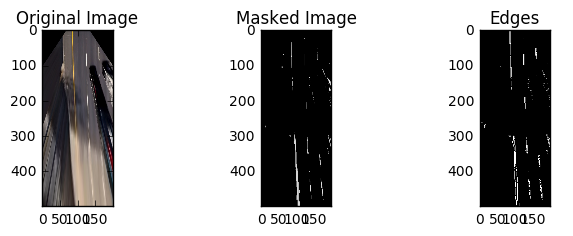

In [119]:
# Display interactive sliders
from IPython import display
from ipywidgets import HBox

display.display(HBox([slider_h_min_chan, slider_h_max_chan, slider_tileGridSize_clahe_mag, slider_clipLimit_clahe_mag]))
display.display(HBox([slider_s_chan, slider_v_chan, slider_gray_min, ]))
display.display(HBox([slider_sobel_angle_min, slider_sobel_angle_max, slider_sobel_mag]))

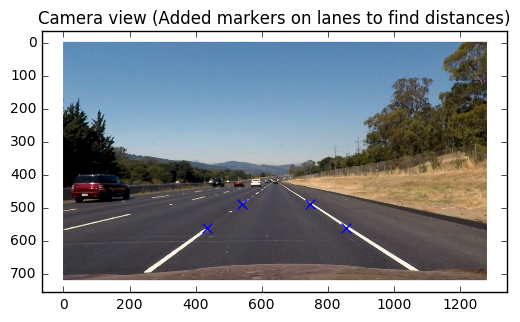


Transformation matrix: 
 [[ -2.97321429e-02  -2.37600446e-01   1.18513214e+02]
 [ -4.00287442e-16   1.11383929e-01  -7.58750000e+01]
 [ -9.53928505e-18  -2.38839286e-03   1.00000000e+00]]

Transformation matrix inverse: 
 [[ -3.36336336e+01  -2.18920452e+01   2.32497110e+03]
 [  5.41371989e-13  -1.43193895e+01  -1.08648368e+03]
 [  9.72168173e-16  -3.42003276e-02  -1.59494986e+00]]


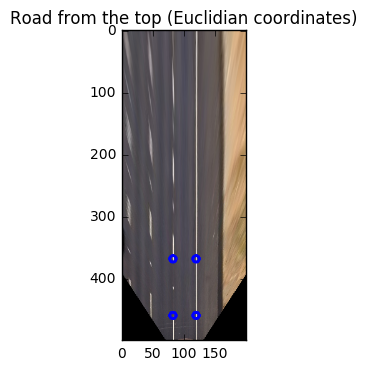

In [94]:
# Find PROJECTIVE transform for the road to find better masking region
# On an highway we could assume for this exercise (not safe in real car, just like masking with a 
# a triangle, that the lines should be fairly parallel to the direction of the vehicle.
# Minimum lane width: Minimum lane width of 12 feet (3.7 m)
# Each dashed line measures 10 feet (3.0 m), and the empty spaces in-between measure 30 feet (9.0m).


example_image = plt.imread('./test_images/straight_lines2.jpg')
#plt.imshow(example_image)
#plt.show()
img_undist = cal_undistort(example_image, cameraMatrix, distCoeffs)
plt.imshow(img_undist)

image_proj_work = img_undist.copy()
plt.imshow(image_proj_work)
plt.title('Camera view (Added markers on lanes to find distances)')

# Mark known points in image
points_px = np.float32( [ [436, 560], [540, 488],   [856, 560], [746, 488] ] )
plt.scatter(points_px[0][0], points_px[0][1], s=50, c='blue', marker='x')
plt.scatter(points_px[1][0], points_px[1][1], s=50, c='blue', marker='x')
plt.scatter(points_px[2][0], points_px[2][1], s=50, c='blue', marker='x')
plt.scatter(points_px[3][0], points_px[3][1], s=50, c='blue', marker='x')
plt.show()

# Points in meters
pt_distance_to_car = 4.0
dash_line_len = 9.0
lane_width = 3.7
center_of_car = 10
points_dest_px = np.float32( [ [center_of_car-lane_width/2, pt_distance_to_car],
                        [center_of_car-lane_width/2, pt_distance_to_car+dash_line_len],
                        [center_of_car+lane_width/2, pt_distance_to_car],
                        [center_of_car+lane_width/2, pt_distance_to_car+dash_line_len] ] )
meters_to_px = 10.0
points_m = meters_to_px * points_dest_px

transfM = cv2.getPerspectiveTransform(points_px,points_m)
print('\nTransformation matrix: \n', transfM)

transfMInv = np.linalg.inv(transfM)
print('\nTransformation matrix inverse: \n', transfMInv)

wrappedIm = cv2.warpPerspective(image_proj_work, transfM, (center_of_car*2*int(meters_to_px),500))


plt.imshow(wrappedIm)
plt.title('Road from the top (Euclidian coordinates)')

#cv2.imwrite('foo.png',wrappedIm)
radius = 5
color_circle = (0,0,255)
thickness = 4
wrappedIm_copy = wrappedIm.copy()

for line in range(points_px.shape[0]):
    points_dest_px2 = np.matmul(transfM, np.concatenate((points_px[line],[1]), axis=0)[np.newaxis].T)
    points_dest_px2 = points_dest_px2/points_dest_px2[2]
    wrappedIm = cv2.circle(wrappedIm, tuple(points_dest_px2[0:2]), radius, color_circle,thickness)

wrappedIm = cv2.flip(wrappedIm,0) #Vertical flip

plt.imshow(wrappedIm)
plt.show()


In [95]:
# Saving calibration data in "static" object for kater global access
class CameraCalibration:
    """
    Saving calibration data in "static" object for kater global access.
    Description of the dictionary field 'value' 
        cameraMatrix: camera matrix
        distCoeffs : camera distorsion coefficients
        transfM : transformation matrix (from pixels to 0.1 meters on the road), use on undistorted image
        transfMInv : transformation matrix inverse (from pixels to 0.1 meters on the road)
        center_of_car : Lateral position of car in the lane
    """
    value = dict()
    def undistort(img):
        """
        Undistort image using the cameraMatrix and the distorsion coefficients
        """
        undist = cv2.undistort(img, CameraCalibration.value['cameraMatrix'], 
                               CameraCalibration.value['distCoeffs'], None,
                               CameraCalibration.value['cameraMatrix'])
        return undist
    def birdview(img):
        """
        Apply wrap perspective transform to undistorted image
        """
        wrappedIm = cv2.warpPerspective(img, CameraCalibration.value['transfM'], 
                                        (CameraCalibration.value['center_of_car'] * 
                                         2*int(CameraCalibration.value['meters_to_px']),500))
        return wrappedIm

# Initialize camera calibration parameter (see parameter definitions above)
CameraCalibration.value['cameraMatrix'] = cameraMatrix
CameraCalibration.value['distCoeffs'] = distCoeffs
CameraCalibration.value['transfM'] = transfM
CameraCalibration.value['transfMInv'] = transfMInv
CameraCalibration.value['center_of_car'] = center_of_car 
CameraCalibration.value['meters_to_px'] = meters_to_px 


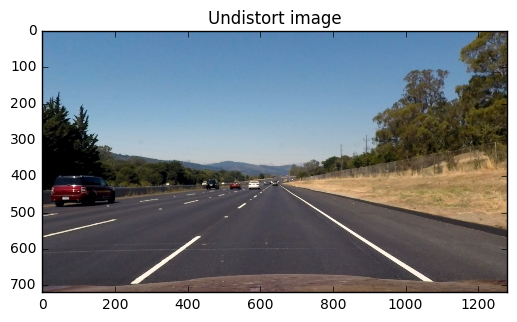

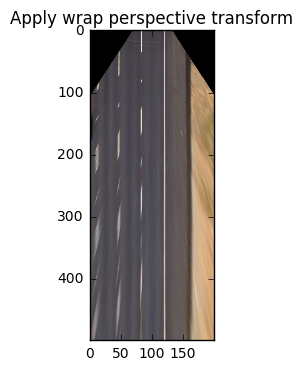

In [96]:
# Testing undistort function
plt.imshow(CameraCalibration.undistort(example_image))
plt.title('Undistort image')
plt.show()
plt.imshow(CameraCalibration.birdview(CameraCalibration.undistort(example_image)))
plt.title('Apply wrap perspective transform')
plt.show()

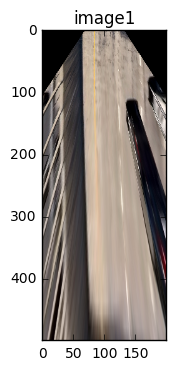

corec -41.8962066667


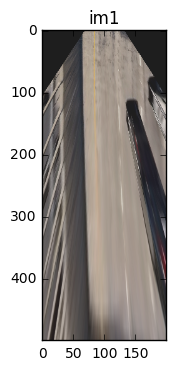

mean1: 126.82649
meanref: 78.47935
std1: 71.3381826533
stdref: 37.0378173436


In [97]:
example_image1 = CameraCalibration.birdview(CameraCalibration.undistort(plt.imread('./test_images/test1.jpg')))
image_ref = CameraCalibration.birdview(CameraCalibration.undistort(plt.imread('./test_images/test2.jpg')))
plt.imshow(example_image1)
plt.title('image1')
plt.show()
im1 = example_image1.astype('float32')
imref = image_ref.astype('float32')
correc = np.mean(image_ref) - np.mean(example_image1)
im1 = np.clip((im1 - correc)*(np.std(image_ref)/np.std(im1))**.5,0,255).astype('uint8')
print('corec',correc)
plt.imshow(im1)
plt.title('im1')
plt.show()


WidgetCom.value['image'] = CameraCalibration.birdview(CameraCalibration.undistort(image))
img, edge_img = compute_image(WidgetCom.value['image'])

example1V = cv2.cvtColor(example_image1, cv2.COLOR_RGB2HSV)[:,:,2]
image_refV = cv2.cvtColor(image_ref, cv2.COLOR_RGB2HSV)[:,:,2]
print('mean1:',np.mean(example1V))
print('meanref:',np.mean(image_refV))
print('std1:',np.std(example1V))
print('stdref:',np.std(image_refV))

In [122]:
example_image = plt.imread('./test_images/test2.jpg')
#example_image = image
from ipywidgets import HBox
WidgetCom.value['image'] = CameraCalibration.birdview(CameraCalibration.undistort(example_image))
boxColor = HBox([slider_h_min_chan, slider_h_max_chan, slider_tileGridSize_clahe_mag, slider_clipLimit_clahe_mag])
boxSV = HBox([slider_s_chan, slider_v_chan,slider_gray_min])
boxSobel = HBox([slider_sobel_angle_min, slider_sobel_angle_max, slider_sobel_mag])
display.display(boxColor,boxSV, boxSobel)


# Experimenting with histogram
# Hmin : 17
# Hmax : 512
# Smin : 88
# Vmin : 1
# gray : 195
# tileGridSize: 8
# clipLimit : 2
# sobel mag : 80


./test_images\straight_lines1.jpg


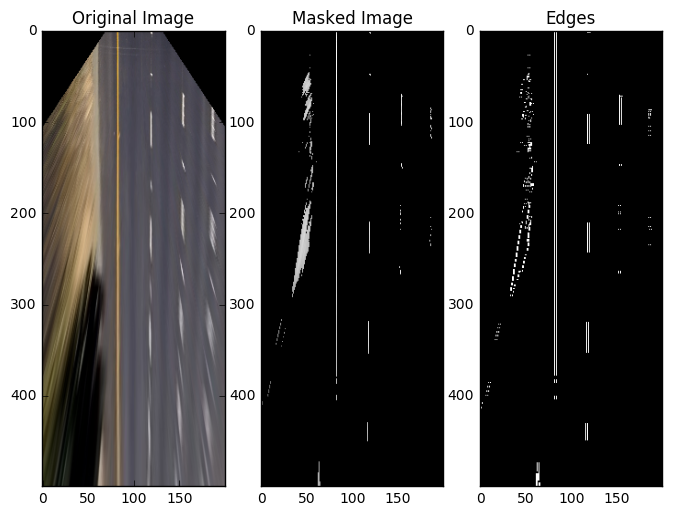



./test_images\straight_lines2.jpg


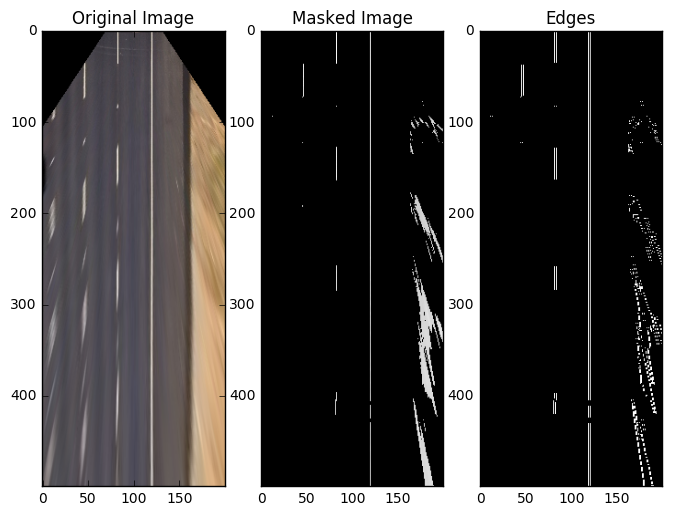



./test_images\test1.jpg


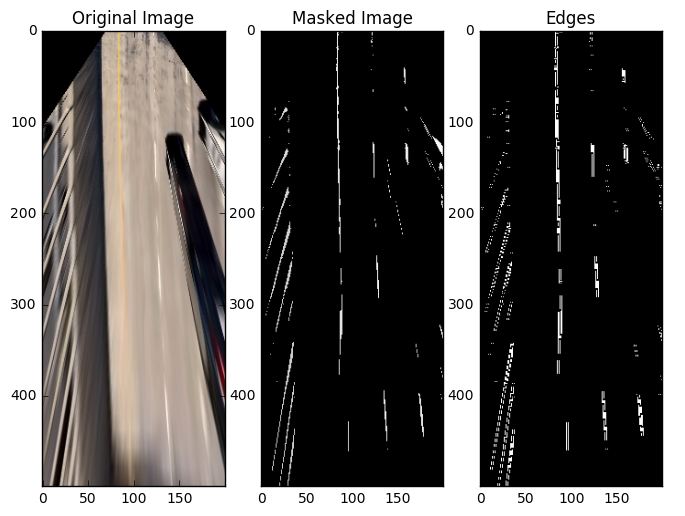



./test_images\test2.jpg


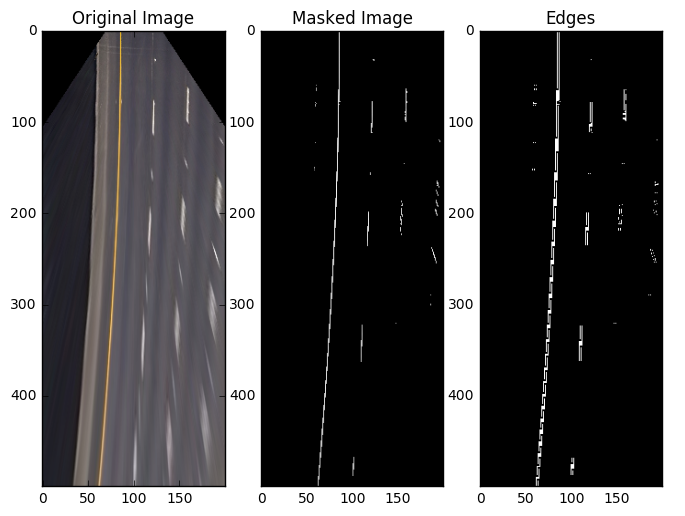



./test_images\test3.jpg


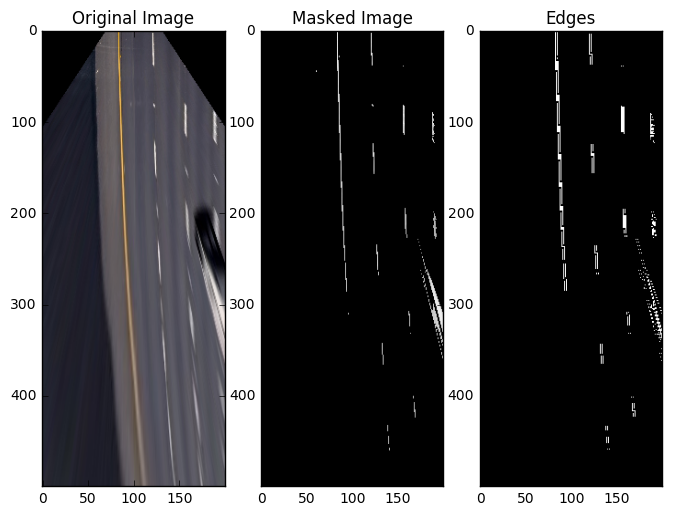



./test_images\test4.jpg


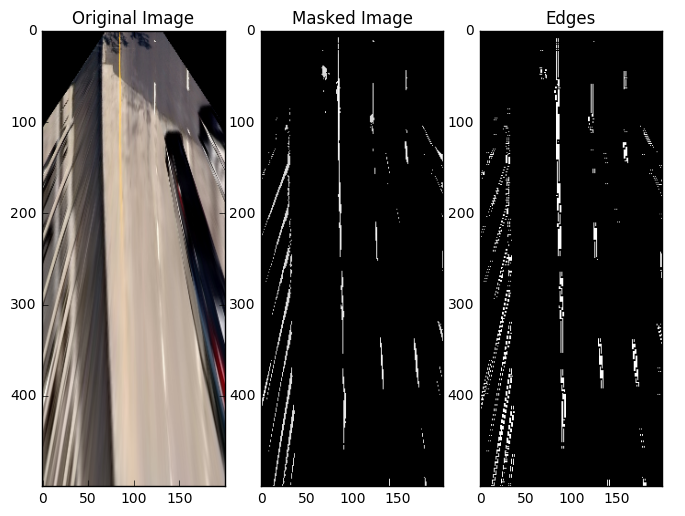



./test_images\test5.jpg


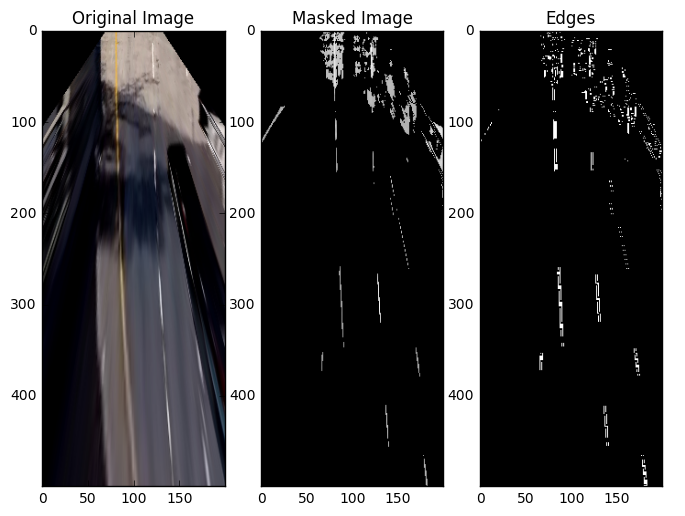



./test_images\test6.jpg


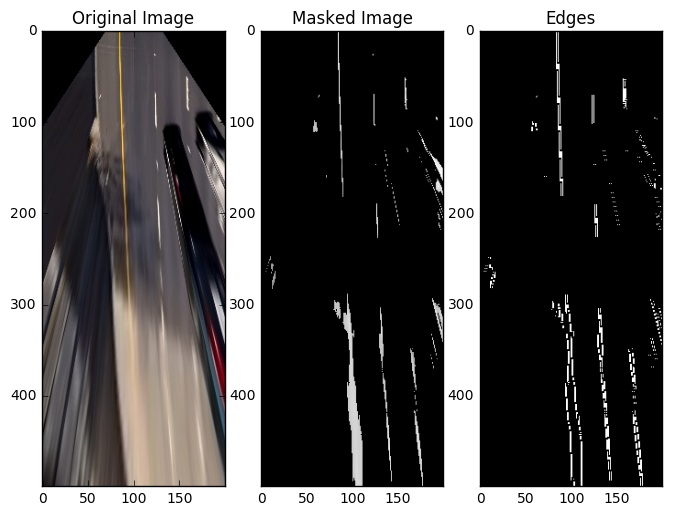

In [123]:
## Display all test images
list_images = glob.glob('./test_images/*.jpg')

for image_file in list_images:
    print(image_file)
    image = plt.imread(image_file)
    WidgetCom.value['image'] = CameraCalibration.birdview(CameraCalibration.undistort(image))
    img, edge_img = compute_image(WidgetCom.value['image'])

    fig = plt.figure(figsize=(8, 7))
    ax = fig.add_subplot(1, 3, 1)
    plt.title('Original Image')
    ax.imshow(WidgetCom.value['image'])
    ax = fig.add_subplot(1, 3, 2)
    plt.title('Masked Image')
    ax.imshow(img)
    ax = fig.add_subplot(1, 3, 3)
    ax.imshow(edge_img, cmap='gray')
    plt.title('Edges')
    
    plt.show()
    plt.close(fig)
    
    print('')
    print('')
    

In [124]:

# Extract difficult image from extra challenge
from moviepy.editor import VideoFileClip
clip1 = VideoFileClip("project_video.mp4")
image = clip1.get_frame(5)
#image = plt.imread('./test_images/test6.jpg')

birdview_img = CameraCalibration.birdview(CameraCalibration.undistort(image))
img, edge_img = compute_image(birdview_img)

def find_lanes_peaks(edge_img,debug=False):
    binary_warped = edge_img.astype('uint8')
    # Assuming you have created a warped binary image called "binary_warped"
    # Take a histogram of the bottom half of the image
    #histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
    histogram = np.sum(binary_warped[:binary_warped.shape[1]//2,:], axis=0)

    
    if debug:
        plt.imshow(binary_warped)
        plt.show()
        print('Image shape:',binary_warped.shape)
        plt.plot(histogram)
        plt.title('Histogram of lanes')
        plt.show()
        
    x = np.arange(histogram.shape[0])

    def gaussian(x, mu, sig):
        return np.exp(-np.square(x - mu) / (2 * np.square(sig)))

    histogram_gauss = histogram*( (gaussian(x,histogram.shape[0]/2+15,10)) + (gaussian(x,histogram.shape[0]/2-15,10)) )

    if debug:
        plt.plot(x,histogram_gauss)
        plt.title('Adjusted Histogram of lanes (Weighted Gaussian)')
        plt.show()

    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram_gauss.shape[0]/2)
    leftx_base = np.argmax(histogram_gauss[:midpoint])
    rightx_base = np.argmax(histogram_gauss[midpoint:]) + midpoint
    if debug:
        print('Left lane position :',leftx_base)
        print('Right lane position :',rightx_base)
    
    return binary_warped, leftx_base, rightx_base, histogram_gauss

binary_warped,leftx_base, rightx_base, histogram_gauss = find_lanes_peaks(edge_img,debug=True)

OSError: [WinError 6] The handle is invalid

In [ ]:

def lane_sliding_window(binary_warped,leftx_base, rightx_base, histogram_gauss, debug=True):
    # Choose the number of sliding windows
    nwindows = 9
    # Set height of windows
    window_height = np.int(binary_warped.shape[0]/nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated for each window
    leftx_current = leftx_base
    rightx_current = rightx_base
    # Set the width of the windows +/- margin
    margin = 15
    # Set minimum number of pixels found to recenter window
    minpix = 2
    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Window color
    found_lane_color =  (0,255,0)
    no_lane_color =  (255,0,0)
    
    # Create an output image to draw on and  visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255

    # Step through the windows one by one
    for window in range(nwindows, -1, -1):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        # Identify the nonzero pixels in x and y within the window
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
                          (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
                           (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]

        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)


        left_window_color =  right_window_color = no_lane_color
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
            left_window_color = found_lane_color
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))
            right_window_color = found_lane_color
            
        """if len(good_left_inds) > minpix and not len(good_right_inds) > minpix:
            # Draw circles
            radius = 15
            color_circle = (0,0,255)
            thickness = 4
            wrappedIm = cv2.circle(wrappedIm, tuple(points_dest_px2[0:2]), radius, color_circle,thickness)"""
            
        # Draw the windows on the visualization image
        out_img = cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),left_window_color, 2) 
        out_img = cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),right_window_color, 2) 

    # Concatenate the arrays of indices
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 

    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    
    if debug:
        print(left_fit)
        print(right_fit)

    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

    out_img = cv2.addWeighted(out_img,0.5,birdview_img,0.9,0)

    
    return left_fit, right_fit, out_img



def generate_plot_points(binary_warped, left_fit, right_fit):
    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    return ploty, left_fitx, right_fitx

left_fit, right_fit,  out_img = lane_sliding_window(binary_warped,leftx_base, rightx_base, histogram_gauss)
ploty, left_fitx, right_fitx = generate_plot_points(binary_warped, left_fit, right_fit)
print(left_fit)
print(right_fit)
plt.imshow(out_img)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, binary_warped.shape[1] )
plt.ylim(binary_warped.shape[0], 0)
plt.show()

In [ ]:
# Assume you now have a new warped binary image 
# from the next frame of video (also called "binary_warped")
# It's now much easier to find line pixels!
def poly_envelope_lane_search(binary_warped, left_fit, right_fit):
    
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])

    margin = 8
    left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] + margin))) 
    right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] + margin)))  

    # Again, extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]

    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)

    # Generate x and y values for plotting
    ploty, left_fitx, right_fitx = generate_plot_points(binary_warped, left_fit, right_fit)
    return left_fitx, right_fitx, ploty, leftx, lefty, rightx, righty, left_lane_inds, right_lane_inds

left_fitx, right_fitx, ploty, leftx, lefty, rightx, righty, left_lane_inds, right_lane_inds = poly_envelope_lane_search(binary_warped, left_fit, right_fit)

In [ ]:
# Create an image to draw on and an image to show the selection window
def draw_poly_search (binary_warped, left_fitx, right_fitx, ploty, leftx, lefty, rightx, righty, debug=False):
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    window_img = np.zeros_like(out_img)
    # Color in left and right line pixels
    #out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    #out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
    out_img[lefty, leftx] = [255, 0, 0]
    out_img[righty,rightx] = [0, 0, 255]

    # Generate a polygon to illustrate the search window area
    # And recast the x and y points into usable format for cv2.fillPoly()
    margin = 8
    left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
    left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, ploty])))])
    left_line_pts = np.hstack((left_line_window1, left_line_window2))
    right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
    right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, ploty])))])
    right_line_pts = np.hstack((right_line_window1, right_line_window2))

    # Draw the lane onto the warped blank image
    if debug:
        cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
        cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
        result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
        plt.imshow(result)
        plt.plot(left_fitx, ploty, color='yellow')
        plt.plot(right_fitx, ploty, color='yellow')
        plt.xlim(0, binary_warped.shape[1] )
        plt.ylim(binary_warped.shape[0], 0)


draw_poly_search (binary_warped, left_fitx, right_fitx, ploty, leftx, lefty, rightx, righty, debug=True)

In [ ]:
def add_overlay_on_frame(image, binary_warped, left_fitx, right_fitx, ploty):
    # Create an image to draw the lines on
    warp_zero = np.zeros_like(binary_warped).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))*0
    
    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))

    # Draw the lane onto the warped blank image
    overlay_color = (0,30, 255)
    color_warp = cv2.fillPoly(color_warp, np.int_([pts]), overlay_color)
    #plt.imshow(color_warp)
    #plt.show()

    # Warp the blank back to original image space using inverse perspective matrix
    newwarp = cv2.warpPerspective(color_warp, CameraCalibration.value['transfMInv'], (image.shape[1], image.shape[0])) 
    
    # Combine the result with the original image
    image = cv2.addWeighted(image, 1, newwarp, 0.3, 0)
    return image
    
result = add_overlay_on_frame(image, binary_warped, left_fitx, right_fitx, ploty)

plt.imshow(result)
plt.show()

In [ ]:
class Filter:
    """
    
    This class is a static class. 
    Just one instance of the parameters is needed.
    """
    value = dict()
    
    def apply_coef(left_fit, right_fit):
        Filter.value['left_fit_list'].append(left_fit)
        Filter.value['right_fit_list'].append(right_fit)
        coeffs = Filter.value['coeffs_stable'] if Filter.is_stable() else Filter.value['coeffs_unstable']
        #print('In = :', left_fit)
        if len(Filter.value['left_fit_list'])>len(coeffs):
            del Filter.value['left_fit_list'][0]
            del Filter.value['right_fit_list'][0]
            left_fit = np.zeros(3)
            right_fit = np.zeros(3)
            for lfit, rfit, coeff in zip(Filter.value['left_fit_list'], Filter.value['right_fit_list'], coeffs):
                left_fit  = left_fit + lfit*coeff
                right_fit = right_fit + rfit*coeff
        
        #print('Out = :', left_fit)
        return left_fit, right_fit
    
    def save_fit(left_fit, right_fit):
        Filter.value['left_fit_list'][-1] = left_fit
        Filter.value['right_fit_list'][-1] = right_fit  
    
    def radius(left_fit, right_fit):
        y_eval = 40 # Evaluate curvature at 20 meters
        left_curverad = ((1 + (2*left_fit[0]*y_eval + left_fit[1])**2)**1.5) / np.absolute(2*left_fit[0])
        right_curverad = ((1 + (2*right_fit[0]*y_eval + right_fit[1])**2)**1.5) / np.absolute(2*right_fit[0])
        left_curverad = left_curverad/CameraCalibration.value['meters_to_px']
        right_curverad = right_curverad/CameraCalibration.value['meters_to_px']
        return left_curverad, right_curverad
    
    def save_radius(left_curverad, right_curverad):
        Filter.value['left_radius'].append(left_curverad)
        Filter.value['right_radius'].append(right_curverad)
        
        if len(Filter.value['left_radius'])>len(Filter.value['coeffs_stable']):
            del Filter.value['left_radius'][0]
            del Filter.value['right_radius'][0]
    
    def is_stable():
        stable = False
        if len(Filter.value['left_radius'])>=2 and len(Filter.value['left_fit_list'])>=2:
            difference = Filter.value['left_radius'][-1] - Filter.value['left_radius'][-2]
            relative_diff = difference/(Filter.value['left_radius'][-1] + 0.1)
            stable = True if relative_diff<0.05 else False
        return stable
    
    def are_lanes_parallel(left_curverad, right_curverad):
        difference = left_curverad-right_curverad
        relative_diff = difference/(left_curverad + 0.1)
        parallel = True if relative_diff<0.35 else False
        
        return parallel
            
Filter.value['left_fit_list'] = list()
Filter.value['right_fit_list'] = list()
Filter.value['left_radius'] = list()
Filter.value['right_radius'] = list()
Filter.value['coeffs_stable'] = [0.3,0.4, 0.3]
Filter.value['coeffs_unstable'] = [0.6,0.3, 0.1]

# Define callback for processing image
def process_image(image):
    minpix = 1000
    image = CameraCalibration.undistort(image)
    birdview_img = CameraCalibration.birdview(image)
    img, edge_img = compute_image(birdview_img)
    binary_warped,leftx_base, rightx_base, histogram_gauss = find_lanes_peaks(edge_img,debug=False)
    
    lateral_center = (rightx_base+leftx_base)/2
    vehicle_center = binary_warped.shape[1]//2
    vehicle_later_position =  (vehicle_center - lateral_center)/CameraCalibration.value['meters_to_px']
    
    try:
        if len(Filter.value['left_radius'])>1 and Filter.are_lanes_parallel(Filter.value['left_radius'][-1], 
                                     Filter.value['right_radius'][-1]) and len(Filter.value['left_fit_list'])>1:
            left_fit =  Filter.value['left_fit_list'][-1]
            right_fit = Filter.value['right_fit_list'][-1]
            
            print('Try using use poly envelope')
            #left_fit, right_fit,  out_img = lane_sliding_window(binary_warped,leftx_base, rightx_base, histogram_gauss,debug=False)
            left_fitx, right_fitx, ploty, leftx, lefty, rightx, righty, left_lane_inds, right_lane_inds  = poly_envelope_lane_search(binary_warped, left_fit, right_fit)
            print('print(left_lane_inds.shape[0])', left_lane_inds.shape[0])
            print('print(right_lane_inds.shape[0])', right_lane_inds.shape[0])
            if left_lane_inds.shape[0]<minpix or right_lane_inds.shape[0]<minpix:
                print('Not enough pixels: Using sliding window')
                left_fit, right_fit,  out_img = lane_sliding_window(binary_warped,leftx_base, rightx_base, histogram_gauss,debug=False)
        else:
            print('Unstable geometry: Using sliding window')
            left_fit, right_fit,  out_img = lane_sliding_window(binary_warped,leftx_base, rightx_base, histogram_gauss,debug=False)
        
    except Exception as err:
        if len(Filter.value['left_fit_list'])>0:
            left_fit =  Filter.value['left_fit_list'][-1]
            right_fit = Filter.value['right_fit_list'][-1]
            print('Exception called :' + str(err))
        else:
            print('Exception called :' + str(err))
            return image
        
    if len(left_fit)>0 and len(right_fit)>0:
        left_fit, right_fit = Filter.apply_coef(left_fit, right_fit)
        Filter.save_fit(left_fit, right_fit)
        
    ploty, left_fitx, right_fitx = generate_plot_points(binary_warped, left_fit, right_fit)
    
    #draw_poly_search (binary_warped, left_fitx, right_fitx, ploty, leftx, lefty, rightx, righty)
    result = add_overlay_on_frame(image, binary_warped, left_fitx, right_fitx, ploty)
    left_curverad, right_curverad = Filter.radius(left_fit, right_fit)
    Filter.save_radius(left_curverad, right_curverad)
    
    left_curverad_str = 'straight' if left_curverad>3000 else '{:6.0f}'.format(left_curverad)
    right_curverad_str = 'straight' if right_curverad>3000 else '{:6.0f}'.format(right_curverad) 
            
    cv2.putText(result,'left curve radius  : {} m'.format(left_curverad_str),
                (10,50), cv2.FONT_HERSHEY_PLAIN, 3,(255,255,255),2,cv2.LINE_AA)
    cv2.putText(result,'right curve radius : {} m'.format(right_curverad_str) ,
                (10,90), cv2.FONT_HERSHEY_PLAIN, 3,(255,255,255),2,cv2.LINE_AA)
    cv2.putText(result,'stable : {} '.format(Filter.is_stable()) ,
                (10,130), cv2.FONT_HERSHEY_PLAIN, 3,(255,255,255),2,cv2.LINE_AA)
    cv2.putText(result,'parallel lanes : {} '.format(Filter.are_lanes_parallel(left_curverad, right_curverad)) ,
                (10,170), cv2.FONT_HERSHEY_PLAIN, 3,(255,255,255),2,cv2.LINE_AA)
    cv2.putText(result,'lateral position : {} m'.format(vehicle_later_position) ,
                (10,200), cv2.FONT_HERSHEY_PLAIN, 3,(255,255,255),2,cv2.LINE_AA)
    
    return result


In [ ]:
# Extract difficult image from extra challenge
from moviepy.editor import VideoFileClip
clip1 = VideoFileClip("project_video.mp4")
image = clip1.get_frame(4.5)
#image = plt.imread('./test_images/test6.jpg')
plt.clf()
plt.imshow((binary_warped))
plt.show()
result = process_image(image)
plt.clf()
plt.imshow(result)
plt.show()

Unstable geometry: Using sliding window


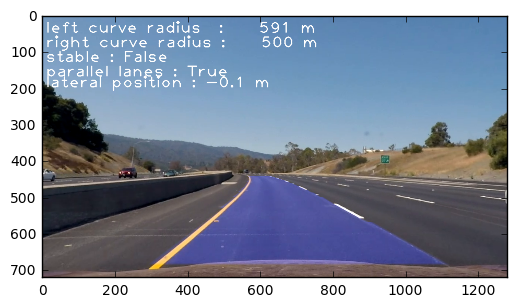

In [22]:
# Extract difficult image from extra challenge
from moviepy.editor import VideoFileClip
clip1 = VideoFileClip("project_video.mp4")
image = clip1.get_frame(5)

result = process_image(image)
plt.clf()
plt.imshow(result)
plt.show()

In [24]:
from moviepy.editor import VideoFileClip
clip1 = VideoFileClip("project_video.mp4")
video_output = './output_images/project_video.mp4'

Filter.value['left_fit_list'] = list()
Filter.value['right_fit_list'] = list()
Filter.value['coeffs_stable'] = [0.5, 0.3, 0.2]
Filter.value['coeffs_unstable'] = [0.7, 0.30, 0.1]
white_clip = clip1.fl_image(process_image)

%time white_clip.write_videofile(video_output, audio=False)

Unstable geometry: Using sliding window
[MoviePy] >>>> Building video ./output_images/project_video.mp4
[MoviePy] Writing video ./output_images/project_video.mp4


  0%|                                                 | 0/1261 [00:00<?, ?it/s]

Unstable geometry: Using sliding window


  0%|                                         | 1/1261 [00:00<04:13,  4.97it/s]

Try using use poly envelope
print(left_lane_inds.shape[0]) 1113
print(right_lane_inds.shape[0]) 1113
Try using use poly envelope
print(left_lane_inds.shape[0]) 1093
print(right_lane_inds.shape[0]) 1093


  0%|                                         | 3/1261 [00:00<03:26,  6.10it/s]

Try using use poly envelope
print(left_lane_inds.shape[0]) 1052
print(right_lane_inds.shape[0]) 1052
Try using use poly envelope
print(left_lane_inds.shape[0]) 1027
print(right_lane_inds.shape[0]) 1027


  0%|▏                                        | 5/1261 [00:00<02:51,  7.33it/s]

Try using use poly envelope
print(left_lane_inds.shape[0]) 969
print(right_lane_inds.shape[0]) 969
Not enough pixels: Using sliding window
Try using use poly envelope
print(left_lane_inds.shape[0]) 944
print(right_lane_inds.shape[0]) 944
Not enough pixels: Using sliding window


  1%|▏                                        | 7/1261 [00:00<02:29,  8.37it/s]

Try using use poly envelope
print(left_lane_inds.shape[0]) 899
print(right_lane_inds.shape[0]) 899
Not enough pixels: Using sliding window
Try using use poly envelope
print(left_lane_inds.shape[0]) 931
print(right_lane_inds.shape[0]) 931
Not enough pixels: Using sliding window


  1%|▎                                        | 9/1261 [00:00<02:11,  9.52it/s]

Try using use poly envelope
print(left_lane_inds.shape[0]) 952
print(right_lane_inds.shape[0]) 952
Not enough pixels: Using sliding window
Try using use poly envelope
print(left_lane_inds.shape[0]) 927
print(right_lane_inds.shape[0]) 927
Not enough pixels: Using sliding window


  1%|▎                                       | 11/1261 [00:00<01:58, 10.59it/s]

Try using use poly envelope
print(left_lane_inds.shape[0]) 1053
print(right_lane_inds.shape[0]) 1053
Try using use poly envelope
print(left_lane_inds.shape[0]) 1045
print(right_lane_inds.shape[0]) 1045


  1%|▍                                       | 13/1261 [00:01<01:47, 11.58it/s]

Try using use poly envelope
print(left_lane_inds.shape[0]) 1036
print(right_lane_inds.shape[0]) 1036
Try using use poly envelope
print(left_lane_inds.shape[0]) 958
print(right_lane_inds.shape[0]) 958
Not enough pixels: Using sliding window


  1%|▍                                       | 15/1261 [00:01<01:41, 12.30it/s]

Try using use poly envelope
print(left_lane_inds.shape[0]) 914
print(right_lane_inds.shape[0]) 914
Not enough pixels: Using sliding window
Try using use poly envelope
print(left_lane_inds.shape[0]) 889
print(right_lane_inds.shape[0]) 889
Not enough pixels: Using sliding window


  1%|▌                                       | 17/1261 [00:01<01:45, 11.81it/s]

Try using use poly envelope
print(left_lane_inds.shape[0]) 842
print(right_lane_inds.shape[0]) 842
Not enough pixels: Using sliding window
Try using use poly envelope
print(left_lane_inds.shape[0]) 840
print(right_lane_inds.shape[0]) 840
Not enough pixels: Using sliding window


  2%|▌                                       | 19/1261 [00:01<01:46, 11.65it/s]

Try using use poly envelope
print(left_lane_inds.shape[0]) 848
print(right_lane_inds.shape[0]) 848
Not enough pixels: Using sliding window
Try using use poly envelope
print(left_lane_inds.shape[0]) 890
print(right_lane_inds.shape[0]) 890
Not enough pixels: Using sliding window


  2%|▋                                       | 21/1261 [00:01<01:42, 12.05it/s]

Try using use poly envelope
print(left_lane_inds.shape[0]) 889
print(right_lane_inds.shape[0]) 889
Not enough pixels: Using sliding window
Try using use poly envelope
print(left_lane_inds.shape[0]) 940
print(right_lane_inds.shape[0]) 940
Not enough pixels: Using sliding window


  2%|▋                                       | 23/1261 [00:01<01:37, 12.66it/s]

Try using use poly envelope
print(left_lane_inds.shape[0]) 926
print(right_lane_inds.shape[0]) 926
Not enough pixels: Using sliding window
Try using use poly envelope
print(left_lane_inds.shape[0]) 915
print(right_lane_inds.shape[0]) 915
Not enough pixels: Using sliding window


  2%|▊                                       | 25/1261 [00:02<01:35, 12.98it/s]

Try using use poly envelope
print(left_lane_inds.shape[0]) 951
print(right_lane_inds.shape[0]) 951
Not enough pixels: Using sliding window
Try using use poly envelope
print(left_lane_inds.shape[0]) 960
print(right_lane_inds.shape[0]) 960
Not enough pixels: Using sliding window


  2%|▊                                       | 27/1261 [00:02<01:32, 13.32it/s]

Try using use poly envelope
print(left_lane_inds.shape[0]) 970
print(right_lane_inds.shape[0]) 970
Not enough pixels: Using sliding window
Try using use poly envelope
print(left_lane_inds.shape[0]) 978
print(right_lane_inds.shape[0]) 978
Not enough pixels: Using sliding window


  2%|▉                                       | 29/1261 [00:02<01:30, 13.60it/s]

Try using use poly envelope
print(left_lane_inds.shape[0]) 877
print(right_lane_inds.shape[0]) 877
Not enough pixels: Using sliding window
Try using use poly envelope
print(left_lane_inds.shape[0]) 879
print(right_lane_inds.shape[0]) 879
Not enough pixels: Using sliding window


  2%|▉                                       | 31/1261 [00:02<01:29, 13.68it/s]

Try using use poly envelope
print(left_lane_inds.shape[0]) 785
print(right_lane_inds.shape[0]) 785
Not enough pixels: Using sliding window
Try using use poly envelope
print(left_lane_inds.shape[0]) 814
print(right_lane_inds.shape[0]) 814
Not enough pixels: Using sliding window


  3%|█                                       | 33/1261 [00:02<01:28, 13.83it/s]

Try using use poly envelope
print(left_lane_inds.shape[0]) 802
print(right_lane_inds.shape[0]) 802
Not enough pixels: Using sliding window
Try using use poly envelope
print(left_lane_inds.shape[0]) 793
print(right_lane_inds.shape[0]) 793
Not enough pixels: Using sliding window


  3%|█                                       | 35/1261 [00:02<01:28, 13.85it/s]

Try using use poly envelope
print(left_lane_inds.shape[0]) 761
print(right_lane_inds.shape[0]) 761
Not enough pixels: Using sliding window
Try using use poly envelope
print(left_lane_inds.shape[0]) 756
print(right_lane_inds.shape[0]) 756
Not enough pixels: Using sliding window


  3%|█▏                                      | 37/1261 [00:02<01:28, 13.86it/s]

Try using use poly envelope
print(left_lane_inds.shape[0]) 764
print(right_lane_inds.shape[0]) 764
Not enough pixels: Using sliding window
Try using use poly envelope
print(left_lane_inds.shape[0]) 782
print(right_lane_inds.shape[0]) 782
Not enough pixels: Using sliding window


  3%|█▏                                      | 39/1261 [00:03<01:28, 13.81it/s]

Try using use poly envelope
print(left_lane_inds.shape[0]) 778
print(right_lane_inds.shape[0]) 778
Not enough pixels: Using sliding window
Try using use poly envelope
print(left_lane_inds.shape[0]) 755
print(right_lane_inds.shape[0]) 755
Not enough pixels: Using sliding window


  3%|█▎                                      | 41/1261 [00:03<01:27, 13.95it/s]

Try using use poly envelope
print(left_lane_inds.shape[0]) 758
print(right_lane_inds.shape[0]) 758
Not enough pixels: Using sliding window
Try using use poly envelope
print(left_lane_inds.shape[0]) 751
print(right_lane_inds.shape[0]) 751
Not enough pixels: Using sliding window


  3%|█▎                                      | 43/1261 [00:03<01:28, 13.79it/s]

Try using use poly envelope
print(left_lane_inds.shape[0]) 774
print(right_lane_inds.shape[0]) 774
Not enough pixels: Using sliding window
Try using use poly envelope
print(left_lane_inds.shape[0]) 802
print(right_lane_inds.shape[0]) 802
Not enough pixels: Using sliding window


  4%|█▍                                      | 45/1261 [00:03<01:31, 13.32it/s]

Try using use poly envelope
print(left_lane_inds.shape[0]) 796
print(right_lane_inds.shape[0]) 796
Not enough pixels: Using sliding window
Try using use poly envelope
print(left_lane_inds.shape[0]) 818
print(right_lane_inds.shape[0]) 818
Not enough pixels: Using sliding window


  4%|█▍                                      | 47/1261 [00:03<01:41, 12.00it/s]

Try using use poly envelope
print(left_lane_inds.shape[0]) 813
print(right_lane_inds.shape[0]) 813
Not enough pixels: Using sliding window
Try using use poly envelope
print(left_lane_inds.shape[0]) 830
print(right_lane_inds.shape[0]) 830
Not enough pixels: Using sliding window


  4%|█▌                                      | 49/1261 [00:03<01:45, 11.46it/s]

Try using use poly envelope
print(left_lane_inds.shape[0]) 848
print(right_lane_inds.shape[0]) 848
Not enough pixels: Using sliding window
Try using use poly envelope
print(left_lane_inds.shape[0]) 872
print(right_lane_inds.shape[0]) 872
Not enough pixels: Using sliding window


  4%|█▌                                      | 51/1261 [00:04<01:45, 11.49it/s]

Try using use poly envelope
print(left_lane_inds.shape[0]) 848
print(right_lane_inds.shape[0]) 848
Not enough pixels: Using sliding window
Try using use poly envelope
print(left_lane_inds.shape[0]) 838
print(right_lane_inds.shape[0]) 838
Not enough pixels: Using sliding window


  4%|█▋                                      | 53/1261 [00:04<01:47, 11.26it/s]

Try using use poly envelope
print(left_lane_inds.shape[0]) 828
print(right_lane_inds.shape[0]) 828
Not enough pixels: Using sliding window
Try using use poly envelope
print(left_lane_inds.shape[0]) 840
print(right_lane_inds.shape[0]) 840
Not enough pixels: Using sliding window


  4%|█▋                                      | 55/1261 [00:04<01:45, 11.44it/s]

Try using use poly envelope
print(left_lane_inds.shape[0]) 817
print(right_lane_inds.shape[0]) 817
Not enough pixels: Using sliding window
Try using use poly envelope
print(left_lane_inds.shape[0]) 790
print(right_lane_inds.shape[0]) 790
Not enough pixels: Using sliding window


  5%|█▊                                      | 57/1261 [00:04<01:46, 11.27it/s]

Try using use poly envelope
print(left_lane_inds.shape[0]) 768
print(right_lane_inds.shape[0]) 768
Not enough pixels: Using sliding window
Try using use poly envelope
print(left_lane_inds.shape[0]) 719
print(right_lane_inds.shape[0]) 719
Not enough pixels: Using sliding window


  5%|█▊                                      | 59/1261 [00:04<01:45, 11.37it/s]

Try using use poly envelope
print(left_lane_inds.shape[0]) 721
print(right_lane_inds.shape[0]) 721
Not enough pixels: Using sliding window
Try using use poly envelope
print(left_lane_inds.shape[0]) 753
print(right_lane_inds.shape[0]) 753
Not enough pixels: Using sliding window


  5%|█▉                                      | 61/1261 [00:04<01:48, 11.05it/s]

Try using use poly envelope
print(left_lane_inds.shape[0]) 749
print(right_lane_inds.shape[0]) 749
Not enough pixels: Using sliding window
Try using use poly envelope
print(left_lane_inds.shape[0]) 740
print(right_lane_inds.shape[0]) 740
Not enough pixels: Using sliding window


  5%|█▉                                      | 63/1261 [00:05<01:48, 11.07it/s]

Try using use poly envelope
print(left_lane_inds.shape[0]) 745
print(right_lane_inds.shape[0]) 745
Not enough pixels: Using sliding window
Try using use poly envelope
print(left_lane_inds.shape[0]) 774
print(right_lane_inds.shape[0]) 774
Not enough pixels: Using sliding window


  5%|██                                      | 65/1261 [00:05<01:47, 11.15it/s]

Try using use poly envelope
print(left_lane_inds.shape[0]) 762
print(right_lane_inds.shape[0]) 762
Not enough pixels: Using sliding window
Try using use poly envelope
print(left_lane_inds.shape[0]) 794
print(right_lane_inds.shape[0]) 794
Not enough pixels: Using sliding window


  5%|██▏                                     | 67/1261 [00:05<01:45, 11.27it/s]

Try using use poly envelope
print(left_lane_inds.shape[0]) 770
print(right_lane_inds.shape[0]) 770
Not enough pixels: Using sliding window
Try using use poly envelope
print(left_lane_inds.shape[0]) 744
print(right_lane_inds.shape[0]) 744
Not enough pixels: Using sliding window


  5%|██▏                                     | 69/1261 [00:05<01:47, 11.13it/s]

Try using use poly envelope
print(left_lane_inds.shape[0]) 756
print(right_lane_inds.shape[0]) 756
Not enough pixels: Using sliding window
Try using use poly envelope
print(left_lane_inds.shape[0]) 736
print(right_lane_inds.shape[0]) 736
Not enough pixels: Using sliding window


  6%|██▎                                     | 71/1261 [00:05<01:46, 11.22it/s]

Try using use poly envelope
print(left_lane_inds.shape[0]) 778
print(right_lane_inds.shape[0]) 778
Not enough pixels: Using sliding window
Try using use poly envelope
print(left_lane_inds.shape[0]) 773
print(right_lane_inds.shape[0]) 773
Not enough pixels: Using sliding window


  6%|██▎                                     | 73/1261 [00:06<01:46, 11.15it/s]

Try using use poly envelope
print(left_lane_inds.shape[0]) 791
print(right_lane_inds.shape[0]) 791
Not enough pixels: Using sliding window
Try using use poly envelope
print(left_lane_inds.shape[0]) 800
print(right_lane_inds.shape[0]) 800
Not enough pixels: Using sliding window


  6%|██▍                                     | 75/1261 [00:06<01:45, 11.25it/s]

Try using use poly envelope
print(left_lane_inds.shape[0]) 805
print(right_lane_inds.shape[0]) 805
Not enough pixels: Using sliding window
Try using use poly envelope
print(left_lane_inds.shape[0]) 865
print(right_lane_inds.shape[0]) 865
Not enough pixels: Using sliding window


  6%|██▍                                     | 77/1261 [00:06<01:44, 11.32it/s]

Try using use poly envelope
print(left_lane_inds.shape[0]) 887
print(right_lane_inds.shape[0]) 887
Not enough pixels: Using sliding window
Try using use poly envelope
print(left_lane_inds.shape[0]) 931
print(right_lane_inds.shape[0]) 931
Not enough pixels: Using sliding window


  6%|██▌                                     | 79/1261 [00:06<01:45, 11.16it/s]

Try using use poly envelope
print(left_lane_inds.shape[0]) 924
print(right_lane_inds.shape[0]) 924
Not enough pixels: Using sliding window
Try using use poly envelope
print(left_lane_inds.shape[0]) 905
print(right_lane_inds.shape[0]) 905
Not enough pixels: Using sliding window


  6%|██▌                                     | 81/1261 [00:06<01:46, 11.05it/s]

Try using use poly envelope
print(left_lane_inds.shape[0]) 861
print(right_lane_inds.shape[0]) 861
Not enough pixels: Using sliding window
Try using use poly envelope
print(left_lane_inds.shape[0]) 869
print(right_lane_inds.shape[0]) 869
Not enough pixels: Using sliding window


  7%|██▋                                     | 83/1261 [00:06<01:45, 11.18it/s]

Try using use poly envelope
print(left_lane_inds.shape[0]) 934
print(right_lane_inds.shape[0]) 934
Not enough pixels: Using sliding window
Try using use poly envelope
print(left_lane_inds.shape[0]) 892
print(right_lane_inds.shape[0]) 892
Not enough pixels: Using sliding window


  7%|██▋                                     | 85/1261 [00:07<01:45, 11.14it/s]

Try using use poly envelope
print(left_lane_inds.shape[0]) 927
print(right_lane_inds.shape[0]) 927
Not enough pixels: Using sliding window
Try using use poly envelope
print(left_lane_inds.shape[0]) 851
print(right_lane_inds.shape[0]) 851
Not enough pixels: Using sliding window


  7%|██▊                                     | 87/1261 [00:07<01:45, 11.17it/s]

Try using use poly envelope
print(left_lane_inds.shape[0]) 825
print(right_lane_inds.shape[0]) 825
Not enough pixels: Using sliding window
Try using use poly envelope
print(left_lane_inds.shape[0]) 820
print(right_lane_inds.shape[0]) 820
Not enough pixels: Using sliding window


  7%|██▊                                     | 89/1261 [00:07<01:44, 11.21it/s]

Try using use poly envelope
print(left_lane_inds.shape[0]) 775
print(right_lane_inds.shape[0]) 775
Not enough pixels: Using sliding window
Try using use poly envelope
print(left_lane_inds.shape[0]) 861
print(right_lane_inds.shape[0]) 861
Not enough pixels: Using sliding window


  7%|██▉                                     | 91/1261 [00:07<01:42, 11.43it/s]

Try using use poly envelope
print(left_lane_inds.shape[0]) 899
print(right_lane_inds.shape[0]) 899
Not enough pixels: Using sliding window
Try using use poly envelope
print(left_lane_inds.shape[0]) 829
print(right_lane_inds.shape[0]) 829
Not enough pixels: Using sliding window


  7%|██▉                                     | 93/1261 [00:07<01:45, 11.10it/s]

Try using use poly envelope
print(left_lane_inds.shape[0]) 801
print(right_lane_inds.shape[0]) 801
Not enough pixels: Using sliding window
Try using use poly envelope
print(left_lane_inds.shape[0]) 773
print(right_lane_inds.shape[0]) 773
Not enough pixels: Using sliding window


  8%|███                                     | 95/1261 [00:07<01:43, 11.24it/s]

Try using use poly envelope
print(left_lane_inds.shape[0]) 780
print(right_lane_inds.shape[0]) 780
Not enough pixels: Using sliding window
Try using use poly envelope
print(left_lane_inds.shape[0]) 776
print(right_lane_inds.shape[0]) 776
Not enough pixels: Using sliding window


  8%|███                                     | 97/1261 [00:08<01:45, 11.05it/s]

Try using use poly envelope
print(left_lane_inds.shape[0]) 865
print(right_lane_inds.shape[0]) 865
Not enough pixels: Using sliding window
Try using use poly envelope
print(left_lane_inds.shape[0]) 832
print(right_lane_inds.shape[0]) 832
Not enough pixels: Using sliding window


  8%|███▏                                    | 99/1261 [00:08<01:43, 11.27it/s]

Try using use poly envelope
print(left_lane_inds.shape[0]) 886
print(right_lane_inds.shape[0]) 886
Not enough pixels: Using sliding window
Try using use poly envelope
print(left_lane_inds.shape[0]) 860
print(right_lane_inds.shape[0]) 860
Not enough pixels: Using sliding window


  8%|███                                    | 101/1261 [00:08<01:43, 11.22it/s]

Try using use poly envelope
print(left_lane_inds.shape[0]) 826
print(right_lane_inds.shape[0]) 826
Not enough pixels: Using sliding window
Try using use poly envelope
print(left_lane_inds.shape[0]) 898
print(right_lane_inds.shape[0]) 898
Not enough pixels: Using sliding window


  8%|███▏                                   | 103/1261 [00:08<01:41, 11.40it/s]

Try using use poly envelope
print(left_lane_inds.shape[0]) 907
print(right_lane_inds.shape[0]) 907
Not enough pixels: Using sliding window
Try using use poly envelope
print(left_lane_inds.shape[0]) 939
print(right_lane_inds.shape[0]) 939
Not enough pixels: Using sliding window


  8%|███▏                                   | 105/1261 [00:08<01:45, 10.92it/s]

Try using use poly envelope
print(left_lane_inds.shape[0]) 914
print(right_lane_inds.shape[0]) 914
Not enough pixels: Using sliding window
Try using use poly envelope
print(left_lane_inds.shape[0]) 898
print(right_lane_inds.shape[0]) 898
Not enough pixels: Using sliding window


  8%|███▎                                   | 107/1261 [00:09<01:44, 11.07it/s]

Try using use poly envelope
print(left_lane_inds.shape[0]) 834
print(right_lane_inds.shape[0]) 834
Not enough pixels: Using sliding window
Try using use poly envelope
print(left_lane_inds.shape[0]) 835
print(right_lane_inds.shape[0]) 835
Not enough pixels: Using sliding window


  9%|███▎                                   | 109/1261 [00:09<01:45, 10.90it/s]

Try using use poly envelope
print(left_lane_inds.shape[0]) 869
print(right_lane_inds.shape[0]) 869
Not enough pixels: Using sliding window
Try using use poly envelope
print(left_lane_inds.shape[0]) 876
print(right_lane_inds.shape[0]) 876
Not enough pixels: Using sliding window


  9%|███▍                                   | 111/1261 [00:09<01:43, 11.16it/s]

Try using use poly envelope
print(left_lane_inds.shape[0]) 918
print(right_lane_inds.shape[0]) 918
Not enough pixels: Using sliding window
Try using use poly envelope
print(left_lane_inds.shape[0]) 915
print(right_lane_inds.shape[0]) 915
Not enough pixels: Using sliding window


  9%|███▍                                   | 113/1261 [00:09<01:50, 10.37it/s]

Try using use poly envelope
print(left_lane_inds.shape[0]) 886
print(right_lane_inds.shape[0]) 886
Not enough pixels: Using sliding window
Try using use poly envelope
print(left_lane_inds.shape[0]) 881
print(right_lane_inds.shape[0]) 881
Not enough pixels: Using sliding window


  9%|███▌                                   | 115/1261 [00:09<01:53, 10.07it/s]

Try using use poly envelope
print(left_lane_inds.shape[0]) 907
print(right_lane_inds.shape[0]) 907
Not enough pixels: Using sliding window
Try using use poly envelope
print(left_lane_inds.shape[0]) 906
print(right_lane_inds.shape[0]) 906
Not enough pixels: Using sliding window


  9%|███▌                                   | 117/1261 [00:10<01:53, 10.08it/s]

Try using use poly envelope
print(left_lane_inds.shape[0]) 904
print(right_lane_inds.shape[0]) 904
Not enough pixels: Using sliding window
Try using use poly envelope
print(left_lane_inds.shape[0]) 884
print(right_lane_inds.shape[0]) 884
Not enough pixels: Using sliding window


  9%|███▋                                   | 119/1261 [00:10<01:50, 10.30it/s]

Try using use poly envelope
print(left_lane_inds.shape[0]) 832
print(right_lane_inds.shape[0]) 832
Not enough pixels: Using sliding window
Try using use poly envelope
print(left_lane_inds.shape[0]) 852
print(right_lane_inds.shape[0]) 852
Not enough pixels: Using sliding window


 10%|███▋                                   | 121/1261 [00:10<01:46, 10.74it/s]

Try using use poly envelope
print(left_lane_inds.shape[0]) 859
print(right_lane_inds.shape[0]) 859
Not enough pixels: Using sliding window
Try using use poly envelope
print(left_lane_inds.shape[0]) 827
print(right_lane_inds.shape[0]) 827
Not enough pixels: Using sliding window


 10%|███▊                                   | 123/1261 [00:10<01:44, 10.88it/s]

Try using use poly envelope
print(left_lane_inds.shape[0]) 821
print(right_lane_inds.shape[0]) 821
Not enough pixels: Using sliding window
Try using use poly envelope
print(left_lane_inds.shape[0]) 863
print(right_lane_inds.shape[0]) 863
Not enough pixels: Using sliding window


 10%|███▊                                   | 125/1261 [00:10<01:45, 10.79it/s]

Try using use poly envelope
print(left_lane_inds.shape[0]) 862
print(right_lane_inds.shape[0]) 862
Not enough pixels: Using sliding window
Try using use poly envelope
print(left_lane_inds.shape[0]) 881
print(right_lane_inds.shape[0]) 881
Not enough pixels: Using sliding window


 10%|███▉                                   | 127/1261 [00:10<01:45, 10.78it/s]

Try using use poly envelope
print(left_lane_inds.shape[0]) 866
print(right_lane_inds.shape[0]) 866
Not enough pixels: Using sliding window
Try using use poly envelope
Exception called :expected non-empty vector for x


 10%|███▉                                   | 129/1261 [00:11<01:41, 11.17it/s]

Try using use poly envelope
print(left_lane_inds.shape[0]) 945
print(right_lane_inds.shape[0]) 945
Not enough pixels: Using sliding window
Try using use poly envelope
print(left_lane_inds.shape[0]) 865
print(right_lane_inds.shape[0]) 865
Not enough pixels: Using sliding window


 10%|████                                   | 131/1261 [00:11<01:51, 10.15it/s]

Try using use poly envelope
print(left_lane_inds.shape[0]) 860
print(right_lane_inds.shape[0]) 860
Not enough pixels: Using sliding window
Try using use poly envelope
Exception called :expected non-empty vector for x


 11%|████                                   | 133/1261 [00:11<01:55,  9.75it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x


 11%|████▏                                  | 134/1261 [00:11<01:55,  9.74it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x


 11%|████▏                                  | 135/1261 [00:11<02:00,  9.37it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x


 11%|████▏                                  | 136/1261 [00:11<02:00,  9.36it/s]

Try using use poly envelope
print(left_lane_inds.shape[0]) 884
print(right_lane_inds.shape[0]) 884
Not enough pixels: Using sliding window


 11%|████▏                                  | 137/1261 [00:12<01:58,  9.52it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x
Try using use poly envelope
print(left_lane_inds.shape[0]) 884
print(right_lane_inds.shape[0]) 884
Not enough pixels: Using sliding window


 11%|████▎                                  | 139/1261 [00:12<01:50, 10.16it/s]

Unstable geometry: Using sliding window
Try using use poly envelope
print(left_lane_inds.shape[0]) 976
print(right_lane_inds.shape[0]) 976
Not enough pixels: Using sliding window


 11%|████▎                                  | 141/1261 [00:12<01:45, 10.59it/s]

Unstable geometry: Using sliding window
Try using use poly envelope
print(left_lane_inds.shape[0]) 970
print(right_lane_inds.shape[0]) 970
Not enough pixels: Using sliding window


 11%|████▍                                  | 143/1261 [00:12<01:44, 10.67it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x
Try using use poly envelope
print(left_lane_inds.shape[0]) 902
print(right_lane_inds.shape[0]) 902
Not enough pixels: Using sliding window


 11%|████▍                                  | 145/1261 [00:12<01:51, 10.02it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x
Try using use poly envelope
Exception called :expected non-empty vector for x


 12%|████▌                                  | 147/1261 [00:13<02:00,  9.25it/s]

Try using use poly envelope
print(left_lane_inds.shape[0]) 807
print(right_lane_inds.shape[0]) 807
Not enough pixels: Using sliding window


 12%|████▌                                  | 148/1261 [00:13<01:59,  9.28it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x
Try using use poly envelope
print(left_lane_inds.shape[0]) 880
print(right_lane_inds.shape[0]) 880
Not enough pixels: Using sliding window


 12%|████▋                                  | 150/1261 [00:13<01:51,  9.94it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x
Try using use poly envelope
Exception called :expected non-empty vector for x


 12%|████▋                                  | 152/1261 [00:13<01:51,  9.98it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x
Try using use poly envelope
Exception called :expected non-empty vector for x


 12%|████▊                                  | 154/1261 [00:13<02:00,  9.19it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x


 12%|████▊                                  | 155/1261 [00:13<02:05,  8.82it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x


 12%|████▊                                  | 156/1261 [00:13<02:11,  8.39it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x


 12%|████▊                                  | 157/1261 [00:14<02:13,  8.27it/s]

Try using use poly envelope
print(left_lane_inds.shape[0]) 740
print(right_lane_inds.shape[0]) 740
Not enough pixels: Using sliding window


 13%|████▉                                  | 158/1261 [00:14<02:22,  7.76it/s]

Try using use poly envelope
print(left_lane_inds.shape[0]) 724
print(right_lane_inds.shape[0]) 724
Not enough pixels: Using sliding window


 13%|████▉                                  | 159/1261 [00:14<02:26,  7.52it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x


 13%|████▉                                  | 160/1261 [00:14<02:23,  7.67it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x


 13%|████▉                                  | 161/1261 [00:14<02:15,  8.13it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x


 13%|█████                                  | 162/1261 [00:14<02:08,  8.52it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x


 13%|█████                                  | 163/1261 [00:14<02:06,  8.71it/s]

Try using use poly envelope
print(left_lane_inds.shape[0]) 776
print(right_lane_inds.shape[0]) 776
Not enough pixels: Using sliding window


 13%|█████                                  | 164/1261 [00:15<02:24,  7.58it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x


 13%|█████                                  | 165/1261 [00:15<02:16,  8.01it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x


 13%|█████▏                                 | 166/1261 [00:15<02:09,  8.48it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x


 13%|█████▏                                 | 167/1261 [00:15<02:04,  8.81it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x


 13%|█████▏                                 | 168/1261 [00:15<02:02,  8.89it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x
Try using use poly envelope
Exception called :expected non-empty vector for x


 13%|█████▎                                 | 170/1261 [00:15<01:50,  9.87it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x
Try using use poly envelope
Exception called :expected non-empty vector for x


 14%|█████▎                                 | 172/1261 [00:15<01:43, 10.57it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x
Try using use poly envelope
Exception called :expected non-empty vector for x


 14%|█████▍                                 | 174/1261 [00:15<01:38, 10.99it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x
Try using use poly envelope
Exception called :expected non-empty vector for x


 14%|█████▍                                 | 176/1261 [00:16<01:35, 11.31it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x
Try using use poly envelope
Exception called :expected non-empty vector for x


 14%|█████▌                                 | 178/1261 [00:16<01:33, 11.60it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x
Try using use poly envelope
Exception called :expected non-empty vector for x


 14%|█████▌                                 | 180/1261 [00:16<01:29, 12.14it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x
Try using use poly envelope
Exception called :expected non-empty vector for x


 14%|█████▋                                 | 182/1261 [00:16<01:29, 12.11it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x
Try using use poly envelope
Exception called :expected non-empty vector for x


 15%|█████▋                                 | 184/1261 [00:16<01:26, 12.47it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x
Try using use poly envelope
Exception called :expected non-empty vector for x


 15%|█████▊                                 | 186/1261 [00:16<01:25, 12.62it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x
Try using use poly envelope
Exception called :expected non-empty vector for x


 15%|█████▊                                 | 188/1261 [00:17<01:26, 12.42it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x
Try using use poly envelope
Exception called :expected non-empty vector for x


 15%|█████▉                                 | 190/1261 [00:17<01:35, 11.19it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x
Try using use poly envelope
Exception called :expected non-empty vector for x


 15%|█████▉                                 | 192/1261 [00:17<01:36, 11.13it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x
Try using use poly envelope
Exception called :expected non-empty vector for x


 15%|██████                                 | 194/1261 [00:17<01:33, 11.37it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x
Try using use poly envelope
Exception called :expected non-empty vector for x


 16%|██████                                 | 196/1261 [00:17<01:30, 11.79it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x
Try using use poly envelope
Exception called :expected non-empty vector for x


 16%|██████                                 | 198/1261 [00:17<01:36, 10.99it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x
Try using use poly envelope
Exception called :expected non-empty vector for x


 16%|██████▏                                | 200/1261 [00:18<01:41, 10.45it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x
Try using use poly envelope
Exception called :expected non-empty vector for x


 16%|██████▏                                | 202/1261 [00:18<01:40, 10.56it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x
Try using use poly envelope
Exception called :expected non-empty vector for x


 16%|██████▎                                | 204/1261 [00:18<01:38, 10.75it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x
Try using use poly envelope
Exception called :expected non-empty vector for x


 16%|██████▎                                | 206/1261 [00:18<01:34, 11.19it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x
Try using use poly envelope
Exception called :expected non-empty vector for x


 16%|██████▍                                | 208/1261 [00:18<01:29, 11.71it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x
Try using use poly envelope
Exception called :expected non-empty vector for x


 17%|██████▍                                | 210/1261 [00:19<01:40, 10.46it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x
Try using use poly envelope
Exception called :expected non-empty vector for x


 17%|██████▌                                | 212/1261 [00:19<01:52,  9.31it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x


 17%|██████▌                                | 213/1261 [00:19<02:02,  8.58it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x
Try using use poly envelope
Exception called :expected non-empty vector for x


 17%|██████▋                                | 215/1261 [00:19<01:52,  9.28it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x
Try using use poly envelope
Exception called :expected non-empty vector for x


 17%|██████▋                                | 217/1261 [00:19<01:45,  9.94it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x
Try using use poly envelope
Exception called :expected non-empty vector for x


 17%|██████▊                                | 219/1261 [00:20<01:40, 10.36it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x
Try using use poly envelope
Exception called :expected non-empty vector for x


 18%|██████▊                                | 221/1261 [00:20<01:35, 10.90it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x
Try using use poly envelope
Exception called :expected non-empty vector for x


 18%|██████▉                                | 223/1261 [00:20<01:30, 11.45it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x
Try using use poly envelope
Exception called :expected non-empty vector for x


 18%|██████▉                                | 225/1261 [00:20<01:27, 11.83it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x
Try using use poly envelope
Exception called :expected non-empty vector for x


 18%|███████                                | 227/1261 [00:20<01:27, 11.87it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x
Try using use poly envelope
Exception called :expected non-empty vector for x


 18%|███████                                | 229/1261 [00:20<01:26, 11.93it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x
Try using use poly envelope
Exception called :expected non-empty vector for x


 18%|███████▏                               | 231/1261 [00:20<01:26, 11.96it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x
Try using use poly envelope
Exception called :expected non-empty vector for x


 18%|███████▏                               | 233/1261 [00:21<01:25, 12.07it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x
Try using use poly envelope
Exception called :expected non-empty vector for x


 19%|███████▎                               | 235/1261 [00:21<01:23, 12.33it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x
Try using use poly envelope
Exception called :expected non-empty vector for x


 19%|███████▎                               | 237/1261 [00:21<01:22, 12.36it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x
Try using use poly envelope
Exception called :expected non-empty vector for x


 19%|███████▍                               | 239/1261 [00:21<01:20, 12.68it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x
Try using use poly envelope
Exception called :expected non-empty vector for x


 19%|███████▍                               | 241/1261 [00:21<01:21, 12.51it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x
Try using use poly envelope
Exception called :expected non-empty vector for x


 19%|███████▌                               | 243/1261 [00:21<01:21, 12.53it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x
Try using use poly envelope
Exception called :expected non-empty vector for x


 19%|███████▌                               | 245/1261 [00:22<01:23, 12.13it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x
Try using use poly envelope
Exception called :expected non-empty vector for x


 20%|███████▋                               | 247/1261 [00:22<01:22, 12.29it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x
Try using use poly envelope
Exception called :expected non-empty vector for x


 20%|███████▋                               | 249/1261 [00:22<01:23, 12.17it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x
Try using use poly envelope
Exception called :expected non-empty vector for x


 20%|███████▊                               | 251/1261 [00:22<01:21, 12.36it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x
Try using use poly envelope
Exception called :expected non-empty vector for x


 20%|███████▊                               | 253/1261 [00:22<01:22, 12.22it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x
Try using use poly envelope
Exception called :expected non-empty vector for x


 20%|███████▉                               | 255/1261 [00:22<01:20, 12.51it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x
Try using use poly envelope
Exception called :expected non-empty vector for x


 20%|███████▉                               | 257/1261 [00:23<01:24, 11.92it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x
Try using use poly envelope
Exception called :expected non-empty vector for x


 21%|████████                               | 259/1261 [00:23<01:31, 10.94it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x
Try using use poly envelope
Exception called :expected non-empty vector for x


 21%|████████                               | 261/1261 [00:23<01:38, 10.15it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x
Try using use poly envelope
Exception called :expected non-empty vector for x


 21%|████████▏                              | 263/1261 [00:23<01:33, 10.71it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x
Try using use poly envelope
Exception called :expected non-empty vector for x


 21%|████████▏                              | 265/1261 [00:23<01:30, 11.00it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x
Try using use poly envelope
Exception called :expected non-empty vector for x


 21%|████████▎                              | 267/1261 [00:24<01:27, 11.32it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x
Try using use poly envelope
Exception called :expected non-empty vector for x


 21%|████████▎                              | 269/1261 [00:24<01:33, 10.58it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x
Try using use poly envelope
Exception called :expected non-empty vector for x


 21%|████████▍                              | 271/1261 [00:24<01:34, 10.44it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x
Try using use poly envelope
Exception called :expected non-empty vector for x


 22%|████████▍                              | 273/1261 [00:24<01:32, 10.64it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x
Try using use poly envelope
Exception called :expected non-empty vector for x


 22%|████████▌                              | 275/1261 [00:24<01:30, 10.88it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x
Try using use poly envelope
Exception called :expected non-empty vector for x


 22%|████████▌                              | 277/1261 [00:24<01:28, 11.11it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x
Try using use poly envelope
Exception called :expected non-empty vector for x


 22%|████████▋                              | 279/1261 [00:25<01:30, 10.81it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x
Try using use poly envelope
Exception called :expected non-empty vector for x


 22%|████████▋                              | 281/1261 [00:25<01:29, 11.00it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x
Try using use poly envelope
Exception called :expected non-empty vector for x


 22%|████████▊                              | 283/1261 [00:25<01:26, 11.35it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x
Try using use poly envelope
Exception called :expected non-empty vector for x


 23%|████████▊                              | 285/1261 [00:25<01:37,  9.99it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x
Try using use poly envelope
Exception called :expected non-empty vector for x


 23%|████████▉                              | 287/1261 [00:25<01:34, 10.29it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x
Try using use poly envelope
Exception called :expected non-empty vector for x


 23%|████████▉                              | 289/1261 [00:26<01:32, 10.51it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x
Try using use poly envelope
Exception called :expected non-empty vector for x


 23%|█████████                              | 291/1261 [00:26<01:35, 10.11it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x
Try using use poly envelope
Exception called :expected non-empty vector for x


 23%|█████████                              | 293/1261 [00:26<01:34, 10.30it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x
Try using use poly envelope
Exception called :expected non-empty vector for x


 23%|█████████                              | 295/1261 [00:26<01:32, 10.48it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x
Try using use poly envelope
Exception called :expected non-empty vector for x


 24%|█████████▏                             | 297/1261 [00:26<01:27, 11.05it/s]

Try using use poly envelope
Exception called :expected non-empty vector for x


KeyboardInterrupt: 

In [44]:
clip1 = VideoFileClip("challenge_video.mp4")
video_output = './output_images/challenge_video.mp4'
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!

Filter.value['left_fit_list'] = list()
Filter.value['right_fit_list'] = list()

Filter.value['coeffs_stable'] = [0.5, 0.3, 0.2]
Filter.value['coeffs_unstable'] = [0.6, 0.35, 0.05]

%time white_clip.write_videofile(video_output, audio=False)

Can use curve mask
print(left_lane_inds.shape[0]) 510
print(right_lane_inds.shape[0]) 510
Not enough pixels: Using sliding window
[MoviePy] >>>> Building video ./output_images/challenge_video.mp4
[MoviePy] Writing video ./output_images/challenge_video.mp4



  0%|                                                  | 0/485 [00:00<?, ?it/s]

Unstable geometry: Using sliding window



  0%|                                          | 1/485 [00:00<01:24,  5.71it/s]

Unstable geometry: Using sliding window
Can use curve mask
print(left_lane_inds.shape[0]) 382
print(right_lane_inds.shape[0]) 382
Not enough pixels: Using sliding window



  1%|▎                                         | 3/485 [00:00<01:10,  6.87it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 414
print(right_lane_inds.shape[0]) 414
Not enough pixels: Using sliding window
Can use curve mask
print(left_lane_inds.shape[0]) 371
print(right_lane_inds.shape[0]) 371
Not enough pixels: Using sliding window



  1%|▍                                         | 5/485 [00:00<01:00,  8.00it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 471
print(right_lane_inds.shape[0]) 471
Not enough pixels: Using sliding window
Can use curve mask
print(left_lane_inds.shape[0]) 483
print(right_lane_inds.shape[0]) 483
Not enough pixels: Using sliding window



  1%|▌                                         | 7/485 [00:00<00:52,  9.17it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 486
print(right_lane_inds.shape[0]) 486
Not enough pixels: Using sliding window
Can use curve mask
print(left_lane_inds.shape[0]) 544
print(right_lane_inds.shape[0]) 544
Not enough pixels: Using sliding window



  2%|▊                                         | 9/485 [00:00<00:46, 10.31it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 575
print(right_lane_inds.shape[0]) 575
Not enough pixels: Using sliding window
Can use curve mask
print(left_lane_inds.shape[0]) 572
print(right_lane_inds.shape[0]) 572
Not enough pixels: Using sliding window



  2%|▉                                        | 11/485 [00:00<00:42, 11.14it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 482
print(right_lane_inds.shape[0]) 482
Not enough pixels: Using sliding window
Can use curve mask
print(left_lane_inds.shape[0]) 381
print(right_lane_inds.shape[0]) 381
Not enough pixels: Using sliding window



  3%|█                                        | 13/485 [00:01<00:39, 11.90it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 397
print(right_lane_inds.shape[0]) 397
Not enough pixels: Using sliding window
Unstable geometry: Using sliding window



  3%|█▎                                       | 15/485 [00:01<00:37, 12.48it/s]

Unstable geometry: Using sliding window
Unstable geometry: Using sliding window



  4%|█▍                                       | 17/485 [00:01<00:36, 13.00it/s]

Unstable geometry: Using sliding window
Unstable geometry: Using sliding window



  4%|█▌                                       | 19/485 [00:01<00:33, 13.72it/s]

Unstable geometry: Using sliding window
Unstable geometry: Using sliding window



  4%|█▊                                       | 21/485 [00:01<00:32, 14.27it/s]

Unstable geometry: Using sliding window
Unstable geometry: Using sliding window



  5%|█▉                                       | 23/485 [00:01<00:31, 14.55it/s]

Unstable geometry: Using sliding window
Unstable geometry: Using sliding window



  5%|██                                       | 25/485 [00:01<00:31, 14.83it/s]

Unstable geometry: Using sliding window
Unstable geometry: Using sliding window



  6%|██▎                                      | 27/485 [00:01<00:30, 14.99it/s]

Unstable geometry: Using sliding window
Unstable geometry: Using sliding window



  6%|██▍                                      | 29/485 [00:02<00:30, 15.11it/s]

Unstable geometry: Using sliding window
Unstable geometry: Using sliding window



  6%|██▌                                      | 31/485 [00:02<00:29, 15.22it/s]

Unstable geometry: Using sliding window
Unstable geometry: Using sliding window



  7%|██▊                                      | 33/485 [00:02<00:29, 15.27it/s]

Unstable geometry: Using sliding window
Unstable geometry: Using sliding window



  7%|██▉                                      | 35/485 [00:02<00:29, 15.37it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 333
print(right_lane_inds.shape[0]) 333
Not enough pixels: Using sliding window
Can use curve mask
print(left_lane_inds.shape[0]) 389
print(right_lane_inds.shape[0]) 389
Not enough pixels: Using sliding window



  8%|███▏                                     | 37/485 [00:02<00:30, 14.86it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 475
print(right_lane_inds.shape[0]) 475
Not enough pixels: Using sliding window
Can use curve mask
print(left_lane_inds.shape[0]) 455
print(right_lane_inds.shape[0]) 455
Not enough pixels: Using sliding window



  8%|███▎                                     | 39/485 [00:02<00:30, 14.49it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 542
print(right_lane_inds.shape[0]) 542
Not enough pixels: Using sliding window
Can use curve mask
print(left_lane_inds.shape[0]) 390
print(right_lane_inds.shape[0]) 390
Not enough pixels: Using sliding window



  8%|███▍                                     | 41/485 [00:02<00:30, 14.34it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 389
print(right_lane_inds.shape[0]) 389
Not enough pixels: Using sliding window
Can use curve mask
print(left_lane_inds.shape[0]) 361
print(right_lane_inds.shape[0]) 361
Not enough pixels: Using sliding window



  9%|███▋                                     | 43/485 [00:03<00:31, 14.05it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 467
print(right_lane_inds.shape[0]) 467
Not enough pixels: Using sliding window
Can use curve mask
print(left_lane_inds.shape[0]) 734
print(right_lane_inds.shape[0]) 734
Not enough pixels: Using sliding window



  9%|███▊                                     | 45/485 [00:03<00:32, 13.57it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 670
print(right_lane_inds.shape[0]) 670
Not enough pixels: Using sliding window
Can use curve mask
print(left_lane_inds.shape[0]) 443
print(right_lane_inds.shape[0]) 443
Not enough pixels: Using sliding window



 10%|███▉                                     | 47/485 [00:03<00:37, 11.78it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 466
print(right_lane_inds.shape[0]) 466
Not enough pixels: Using sliding window
Can use curve mask
print(left_lane_inds.shape[0]) 773
print(right_lane_inds.shape[0]) 773
Not enough pixels: Using sliding window



 10%|████▏                                    | 49/485 [00:03<00:38, 11.34it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 730
print(right_lane_inds.shape[0]) 730
Not enough pixels: Using sliding window
Can use curve mask
print(left_lane_inds.shape[0]) 667
print(right_lane_inds.shape[0]) 667
Not enough pixels: Using sliding window



 11%|████▎                                    | 51/485 [00:03<00:37, 11.44it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 587
print(right_lane_inds.shape[0]) 587
Not enough pixels: Using sliding window
Can use curve mask
print(left_lane_inds.shape[0]) 521
print(right_lane_inds.shape[0]) 521
Not enough pixels: Using sliding window



 11%|████▍                                    | 53/485 [00:04<00:39, 11.04it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 603
print(right_lane_inds.shape[0]) 603
Not enough pixels: Using sliding window
Can use curve mask
print(left_lane_inds.shape[0]) 539
print(right_lane_inds.shape[0]) 539
Not enough pixels: Using sliding window



 11%|████▋                                    | 55/485 [00:04<00:37, 11.34it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 513
print(right_lane_inds.shape[0]) 513
Not enough pixels: Using sliding window
Can use curve mask
print(left_lane_inds.shape[0]) 430
print(right_lane_inds.shape[0]) 430
Not enough pixels: Using sliding window



 12%|████▊                                    | 57/485 [00:04<00:38, 11.05it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 378
print(right_lane_inds.shape[0]) 378
Not enough pixels: Using sliding window
Can use curve mask
print(left_lane_inds.shape[0]) 442
print(right_lane_inds.shape[0]) 442
Not enough pixels: Using sliding window



 12%|████▉                                    | 59/485 [00:04<00:37, 11.43it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 422
print(right_lane_inds.shape[0]) 422
Not enough pixels: Using sliding window
Can use curve mask
print(left_lane_inds.shape[0]) 442
print(right_lane_inds.shape[0]) 442
Not enough pixels: Using sliding window



 13%|█████▏                                   | 61/485 [00:04<00:37, 11.18it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 425
print(right_lane_inds.shape[0]) 425
Not enough pixels: Using sliding window
Can use curve mask
print(left_lane_inds.shape[0]) 377
print(right_lane_inds.shape[0]) 377
Not enough pixels: Using sliding window



 13%|█████▎                                   | 63/485 [00:04<00:36, 11.45it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 318
print(right_lane_inds.shape[0]) 318
Not enough pixels: Using sliding window
Can use curve mask



 13%|█████▍                                   | 65/485 [00:05<00:36, 11.58it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 296
print(right_lane_inds.shape[0]) 296
Not enough pixels: Using sliding window
Can use curve mask



 14%|█████▋                                   | 67/485 [00:05<00:36, 11.55it/s]

Can use curve mask
Can use curve mask



 14%|█████▊                                   | 69/485 [00:05<00:34, 12.06it/s]

Can use curve mask
Can use curve mask



 15%|██████                                   | 71/485 [00:05<00:33, 12.41it/s]

Can use curve mask
Can use curve mask



 15%|██████▏                                  | 73/485 [00:05<00:32, 12.56it/s]

Can use curve mask
Can use curve mask



 15%|██████▎                                  | 75/485 [00:05<00:32, 12.66it/s]

Can use curve mask
Can use curve mask



 16%|██████▌                                  | 77/485 [00:05<00:32, 12.71it/s]

Can use curve mask
Can use curve mask



 16%|██████▋                                  | 79/485 [00:06<00:32, 12.38it/s]

Can use curve mask
Can use curve mask



 17%|██████▊                                  | 81/485 [00:06<00:34, 11.72it/s]

Can use curve mask
Can use curve mask
print(left_lane_inds.shape[0]) 249
print(right_lane_inds.shape[0]) 249
Not enough pixels: Using sliding window



 17%|███████                                  | 83/485 [00:06<00:33, 11.90it/s]

Can use curve mask
Can use curve mask



 18%|███████▏                                 | 85/485 [00:06<00:33, 11.99it/s]

Can use curve mask
Can use curve mask



 18%|███████▎                                 | 87/485 [00:06<00:33, 12.03it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 122
print(right_lane_inds.shape[0]) 122
Not enough pixels: Using sliding window
Can use curve mask
print(left_lane_inds.shape[0]) 150
print(right_lane_inds.shape[0]) 150
Not enough pixels: Using sliding window



 18%|███████▌                                 | 89/485 [00:07<00:34, 11.63it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 144
print(right_lane_inds.shape[0]) 144
Not enough pixels: Using sliding window
Can use curve mask
print(left_lane_inds.shape[0]) 138
print(right_lane_inds.shape[0]) 138
Not enough pixels: Using sliding window



 19%|███████▋                                 | 91/485 [00:07<00:34, 11.51it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 129
print(right_lane_inds.shape[0]) 129
Not enough pixels: Using sliding window
Can use curve mask



 19%|███████▊                                 | 93/485 [00:07<00:34, 11.29it/s]

Can use curve mask
Can use curve mask



 20%|████████                                 | 95/485 [00:07<00:33, 11.63it/s]

Can use curve mask
Can use curve mask



 20%|████████▏                                | 97/485 [00:07<00:32, 11.77it/s]

Can use curve mask
Can use curve mask



 20%|████████▎                                | 99/485 [00:07<00:32, 11.96it/s]

Can use curve mask
Can use curve mask
print(left_lane_inds.shape[0]) 202
print(right_lane_inds.shape[0]) 202
Not enough pixels: Using sliding window



 21%|████████▎                               | 101/485 [00:08<00:32, 11.94it/s]

Can use curve mask
Can use curve mask
print(left_lane_inds.shape[0]) 196
print(right_lane_inds.shape[0]) 196
Not enough pixels: Using sliding window



 21%|████████▍                               | 103/485 [00:08<00:32, 11.87it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 173
print(right_lane_inds.shape[0]) 173
Not enough pixels: Using sliding window
Can use curve mask



 22%|████████▋                               | 105/485 [00:08<00:32, 11.59it/s]

Can use curve mask
Can use curve mask
print(left_lane_inds.shape[0]) 297
print(right_lane_inds.shape[0]) 297
Not enough pixels: Using sliding window



 22%|████████▊                               | 107/485 [00:08<00:33, 11.38it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 271
print(right_lane_inds.shape[0]) 271
Not enough pixels: Using sliding window
Can use curve mask
print(left_lane_inds.shape[0]) 159
print(right_lane_inds.shape[0]) 159
Not enough pixels: Using sliding window



 22%|████████▉                               | 109/485 [00:08<00:33, 11.15it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 257
print(right_lane_inds.shape[0]) 257
Not enough pixels: Using sliding window
Can use curve mask
print(left_lane_inds.shape[0]) 94
print(right_lane_inds.shape[0]) 94
Not enough pixels: Using sliding window



 23%|█████████▏                              | 111/485 [00:08<00:33, 11.08it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 135
print(right_lane_inds.shape[0]) 135
Not enough pixels: Using sliding window
Can use curve mask
print(left_lane_inds.shape[0]) 75
print(right_lane_inds.shape[0]) 75
Not enough pixels: Using sliding window



 23%|█████████▎                              | 113/485 [00:09<00:34, 10.77it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 110
print(right_lane_inds.shape[0]) 110
Not enough pixels: Using sliding window
Can use curve mask
print(left_lane_inds.shape[0]) 136
print(right_lane_inds.shape[0]) 136
Not enough pixels: Using sliding window



 24%|█████████▍                              | 115/485 [00:09<00:33, 10.98it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 179
print(right_lane_inds.shape[0]) 179
Not enough pixels: Using sliding window
Can use curve mask
print(left_lane_inds.shape[0]) 114
print(right_lane_inds.shape[0]) 114
Not enough pixels: Using sliding window



 24%|█████████▋                              | 117/485 [00:09<00:34, 10.78it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 116
print(right_lane_inds.shape[0]) 116
Not enough pixels: Using sliding window
Can use curve mask
print(left_lane_inds.shape[0]) 116
print(right_lane_inds.shape[0]) 116
Not enough pixels: Using sliding window



 25%|█████████▊                              | 119/485 [00:09<00:34, 10.60it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 145
print(right_lane_inds.shape[0]) 145
Not enough pixels: Using sliding window
Can use curve mask
print(left_lane_inds.shape[0]) 152
print(right_lane_inds.shape[0]) 152
Not enough pixels: Using sliding window



 25%|█████████▉                              | 121/485 [00:09<00:35, 10.40it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 151
print(right_lane_inds.shape[0]) 151
Not enough pixels: Using sliding window
Can use curve mask
print(left_lane_inds.shape[0]) 107
print(right_lane_inds.shape[0]) 107
Not enough pixels: Using sliding window



 25%|██████████▏                             | 123/485 [00:10<00:33, 10.72it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 120
print(right_lane_inds.shape[0]) 120
Not enough pixels: Using sliding window
Can use curve mask
print(left_lane_inds.shape[0]) 96
print(right_lane_inds.shape[0]) 96
Not enough pixels: Using sliding window



 26%|██████████▎                             | 125/485 [00:10<00:33, 10.59it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 108
print(right_lane_inds.shape[0]) 108
Not enough pixels: Using sliding window
Can use curve mask
print(left_lane_inds.shape[0]) 72
print(right_lane_inds.shape[0]) 72
Not enough pixels: Using sliding window



 26%|██████████▍                             | 127/485 [00:10<00:33, 10.71it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 94
print(right_lane_inds.shape[0]) 94
Not enough pixels: Using sliding window
Can use curve mask
print(left_lane_inds.shape[0]) 74
print(right_lane_inds.shape[0]) 74
Not enough pixels: Using sliding window



 27%|██████████▋                             | 129/485 [00:10<00:33, 10.60it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 72
print(right_lane_inds.shape[0]) 72
Not enough pixels: Using sliding window
Can use curve mask



 27%|██████████▊                             | 131/485 [00:10<00:32, 10.94it/s]

Can use curve mask
Can use curve mask



 27%|██████████▉                             | 133/485 [00:11<00:32, 10.83it/s]

Can use curve mask
Can use curve mask



 28%|███████████▏                            | 135/485 [00:11<00:31, 11.25it/s]

Can use curve mask
Can use curve mask
print(left_lane_inds.shape[0]) 164
print(right_lane_inds.shape[0]) 164
Not enough pixels: Using sliding window



 28%|███████████▎                            | 137/485 [00:11<00:30, 11.38it/s]

Can use curve mask
print(left_lane_inds.shape[0]) 182
print(right_lane_inds.shape[0]) 182
Not enough pixels: Using sliding window
Can use curve mask
print(left_lane_inds.shape[0]) 260
print(right_lane_inds.shape[0]) 260
Not enough pixels: Using sliding window



 29%|███████████▍                            | 139/485 [00:11<00:30, 11.37it/s]

Unstable geometry: Using sliding window
Can use curve mask



 29%|███████████▋                            | 141/485 [00:11<00:30, 11.29it/s]

Unstable geometry: Using sliding window
Can use curve mask



 29%|███████████▊                            | 143/485 [00:11<00:30, 11.39it/s]

Unstable geometry: Using sliding window
Can use curve mask



 30%|███████████▉                            | 145/485 [00:12<00:29, 11.50it/s]

Can use curve mask
Can use curve mask



 30%|████████████                            | 147/485 [00:12<00:29, 11.62it/s]

Can use curve mask
Can use curve mask



 31%|████████████▎                           | 149/485 [00:12<00:29, 11.27it/s]

Can use curve mask
Can use curve mask



 31%|████████████▍                           | 151/485 [00:12<00:28, 11.53it/s]

Can use curve mask
Can use curve mask



 32%|████████████▌                           | 153/485 [00:12<00:28, 11.70it/s]

Can use curve mask
Can use curve mask



 32%|████████████▊                           | 155/485 [00:12<00:27, 11.91it/s]

Can use curve mask
Can use curve mask



 32%|████████████▉                           | 157/485 [00:13<00:27, 11.78it/s]

Can use curve mask
Can use curve mask



 33%|█████████████                           | 159/485 [00:13<00:27, 11.88it/s]

Can use curve mask
Can use curve mask



 33%|█████████████▎                          | 161/485 [00:13<00:27, 11.87it/s]

Can use curve mask
Can use curve mask



 34%|█████████████▍                          | 163/485 [00:13<00:29, 10.85it/s]

Can use curve mask
Can use curve mask



 34%|█████████████▌                          | 165/485 [00:13<00:33,  9.61it/s]

Can use curve mask
Can use curve mask



 34%|█████████████▊                          | 167/485 [00:14<00:31,  9.98it/s]

Can use curve mask
Can use curve mask



 35%|█████████████▉                          | 169/485 [00:14<00:30, 10.22it/s]

Can use curve mask
Can use curve mask



 35%|██████████████                          | 171/485 [00:14<00:30, 10.26it/s]

Can use curve mask
Can use curve mask



 36%|██████████████▎                         | 173/485 [00:14<00:29, 10.50it/s]

Can use curve mask
Can use curve mask



 36%|██████████████▍                         | 175/485 [00:14<00:28, 10.87it/s]

Can use curve mask
Can use curve mask



 36%|██████████████▌                         | 177/485 [00:14<00:27, 11.03it/s]

Can use curve mask
Can use curve mask



 37%|██████████████▊                         | 179/485 [00:15<00:27, 11.07it/s]

Can use curve mask
Can use curve mask



 37%|██████████████▉                         | 181/485 [00:15<00:29, 10.47it/s]

Can use curve mask
Can use curve mask



 38%|███████████████                         | 183/485 [00:15<00:30,  9.94it/s]

Can use curve mask
Can use curve mask



 38%|███████████████▎                        | 185/485 [00:15<00:30,  9.77it/s]

Can use curve mask
Can use curve mask



 39%|███████████████▍                        | 187/485 [00:16<00:30,  9.93it/s]

Can use curve mask
Can use curve mask



 39%|███████████████▌                        | 189/485 [00:16<00:29, 10.14it/s]

Can use curve mask
Can use curve mask



 39%|███████████████▊                        | 191/485 [00:16<00:27, 10.65it/s]

Can use curve mask
Can use curve mask



 40%|███████████████▉                        | 193/485 [00:16<00:28, 10.14it/s]

Can use curve mask
Can use curve mask



 40%|████████████████                        | 195/485 [00:16<00:30,  9.54it/s]

Can use curve mask
Can use curve mask



 41%|████████████████▏                       | 197/485 [00:17<00:29,  9.80it/s]

Can use curve mask
Can use curve mask



 41%|████████████████▍                       | 199/485 [00:17<00:28, 10.01it/s]

Can use curve mask
Can use curve mask



 41%|████████████████▌                       | 201/485 [00:17<00:28,  9.91it/s]

Can use curve mask



 42%|████████████████▋                       | 202/485 [00:17<00:28,  9.77it/s]

Can use curve mask



 42%|████████████████▋                       | 203/485 [00:17<00:28,  9.78it/s]

Can use curve mask



 42%|████████████████▊                       | 204/485 [00:17<00:28,  9.81it/s]

Can use curve mask



 42%|████████████████▉                       | 205/485 [00:17<00:29,  9.61it/s]

Can use curve mask



 42%|████████████████▉                       | 206/485 [00:17<00:29,  9.40it/s]

Can use curve mask



 43%|█████████████████                       | 207/485 [00:18<00:29,  9.41it/s]

Can use curve mask
Can use curve mask



 43%|█████████████████▏                      | 209/485 [00:18<00:27, 10.02it/s]

Can use curve mask
Can use curve mask



 44%|█████████████████▍                      | 211/485 [00:18<00:26, 10.18it/s]

Can use curve mask
Can use curve mask



 44%|█████████████████▌                      | 213/485 [00:18<00:25, 10.71it/s]

Can use curve mask
Can use curve mask



 44%|█████████████████▋                      | 215/485 [00:18<00:24, 10.85it/s]

Can use curve mask
Can use curve mask



 45%|█████████████████▉                      | 217/485 [00:18<00:23, 11.20it/s]

Can use curve mask
Can use curve mask



 45%|██████████████████                      | 219/485 [00:19<00:23, 11.21it/s]

Can use curve mask
Can use curve mask



 46%|██████████████████▏                     | 221/485 [00:19<00:22, 11.63it/s]

Can use curve mask
Can use curve mask



 46%|██████████████████▍                     | 223/485 [00:19<00:23, 11.33it/s]

Can use curve mask
Can use curve mask



 46%|██████████████████▌                     | 225/485 [00:19<00:23, 10.97it/s]

Can use curve mask
Can use curve mask



 47%|██████████████████▋                     | 227/485 [00:19<00:24, 10.66it/s]

Can use curve mask
Can use curve mask



 47%|██████████████████▉                     | 229/485 [00:19<00:23, 10.81it/s]

Can use curve mask
Can use curve mask



 48%|███████████████████                     | 231/485 [00:20<00:23, 10.59it/s]

Can use curve mask
Can use curve mask



 48%|███████████████████▏                    | 233/485 [00:20<00:23, 10.74it/s]

Can use curve mask
Can use curve mask



 48%|███████████████████▍                    | 235/485 [00:20<00:23, 10.59it/s]

Can use curve mask
Can use curve mask



 49%|███████████████████▌                    | 237/485 [00:20<00:22, 10.81it/s]

Can use curve mask
Can use curve mask



 49%|███████████████████▋                    | 239/485 [00:20<00:24, 10.23it/s]

Can use curve mask
Can use curve mask



 50%|███████████████████▉                    | 241/485 [00:21<00:26,  9.23it/s]

Can use curve mask



 50%|███████████████████▉                    | 242/485 [00:21<00:25,  9.45it/s]

Can use curve mask
Can use curve mask



 50%|████████████████████                    | 244/485 [00:21<00:23, 10.06it/s]

Can use curve mask
Can use curve mask



 51%|████████████████████▎                   | 246/485 [00:21<00:22, 10.40it/s]

Can use curve mask
Can use curve mask



 51%|████████████████████▍                   | 248/485 [00:21<00:21, 11.15it/s]

Can use curve mask
Can use curve mask



 52%|████████████████████▌                   | 250/485 [00:21<00:20, 11.49it/s]

Can use curve mask
Can use curve mask



 52%|████████████████████▊                   | 252/485 [00:22<00:19, 11.79it/s]

Can use curve mask
Can use curve mask



 52%|████████████████████▉                   | 254/485 [00:22<00:19, 11.78it/s]

Can use curve mask
Can use curve mask



 53%|█████████████████████                   | 256/485 [00:22<00:18, 12.23it/s]

Can use curve mask
Can use curve mask



 53%|█████████████████████▎                  | 258/485 [00:22<00:18, 12.00it/s]

Can use curve mask
Can use curve mask



 54%|█████████████████████▍                  | 260/485 [00:22<00:18, 12.49it/s]

Can use curve mask
Can use curve mask



 54%|█████████████████████▌                  | 262/485 [00:22<00:19, 11.52it/s]

Can use curve mask
Can use curve mask



 54%|█████████████████████▊                  | 264/485 [00:23<00:19, 11.43it/s]

Can use curve mask
Can use curve mask



 55%|█████████████████████▉                  | 266/485 [00:23<00:19, 11.02it/s]

Can use curve mask
Can use curve mask



 55%|██████████████████████                  | 268/485 [00:23<00:19, 11.12it/s]

Can use curve mask
Can use curve mask



 56%|██████████████████████▎                 | 270/485 [00:23<00:20, 10.74it/s]

Can use curve mask
Can use curve mask



 56%|██████████████████████▍                 | 272/485 [00:23<00:20, 10.64it/s]

Can use curve mask
Can use curve mask



 56%|██████████████████████▌                 | 274/485 [00:24<00:19, 10.81it/s]

Can use curve mask
Can use curve mask



 57%|██████████████████████▊                 | 276/485 [00:24<00:18, 11.36it/s]

Can use curve mask
Can use curve mask



 57%|██████████████████████▉                 | 278/485 [00:24<00:18, 11.40it/s]

Can use curve mask
Can use curve mask



 58%|███████████████████████                 | 280/485 [00:24<00:17, 11.57it/s]

Can use curve mask
Can use curve mask



 58%|███████████████████████▎                | 282/485 [00:24<00:17, 11.63it/s]

Can use curve mask
Can use curve mask



 59%|███████████████████████▍                | 284/485 [00:24<00:16, 12.31it/s]

Can use curve mask
Can use curve mask



 59%|███████████████████████▌                | 286/485 [00:25<00:16, 12.08it/s]

Can use curve mask
Can use curve mask



 59%|███████████████████████▊                | 288/485 [00:25<00:16, 12.20it/s]

Can use curve mask
Can use curve mask



 60%|███████████████████████▉                | 290/485 [00:25<00:15, 12.22it/s]

Can use curve mask
Can use curve mask



 60%|████████████████████████                | 292/485 [00:25<00:15, 12.12it/s]

Can use curve mask
Can use curve mask



 61%|████████████████████████▏               | 294/485 [00:25<00:16, 11.62it/s]

Can use curve mask
Can use curve mask



 61%|████████████████████████▍               | 296/485 [00:25<00:16, 11.68it/s]

Can use curve mask
Can use curve mask



 61%|████████████████████████▌               | 298/485 [00:26<00:16, 11.29it/s]

Can use curve mask
Can use curve mask



 62%|████████████████████████▋               | 300/485 [00:26<00:15, 11.57it/s]

Can use curve mask
Can use curve mask



 62%|████████████████████████▉               | 302/485 [00:26<00:16, 11.21it/s]

Can use curve mask
Can use curve mask



 63%|█████████████████████████               | 304/485 [00:26<00:16, 11.30it/s]

Can use curve mask
Can use curve mask



 63%|█████████████████████████▏              | 306/485 [00:26<00:15, 11.30it/s]

Can use curve mask
Can use curve mask



 64%|█████████████████████████▍              | 308/485 [00:27<00:16, 10.77it/s]

Can use curve mask
Can use curve mask



 64%|█████████████████████████▌              | 310/485 [00:27<00:16, 10.63it/s]

Can use curve mask
Can use curve mask



 64%|█████████████████████████▋              | 312/485 [00:27<00:16, 10.66it/s]

Can use curve mask
Can use curve mask



 65%|█████████████████████████▉              | 314/485 [00:27<00:15, 11.33it/s]

Can use curve mask
Can use curve mask



 65%|██████████████████████████              | 316/485 [00:27<00:14, 11.47it/s]

Can use curve mask
Can use curve mask



 66%|██████████████████████████▏             | 318/485 [00:27<00:14, 11.70it/s]

Can use curve mask
Can use curve mask



 66%|██████████████████████████▍             | 320/485 [00:28<00:13, 12.02it/s]

Can use curve mask
Can use curve mask



 66%|██████████████████████████▌             | 322/485 [00:28<00:13, 12.20it/s]

Can use curve mask
Can use curve mask



 67%|██████████████████████████▋             | 324/485 [00:28<00:13, 12.29it/s]

Can use curve mask
Can use curve mask



 67%|██████████████████████████▉             | 326/485 [00:28<00:12, 12.35it/s]

Can use curve mask
Can use curve mask



 68%|███████████████████████████             | 328/485 [00:28<00:13, 11.72it/s]

Can use curve mask
Can use curve mask



 68%|███████████████████████████▏            | 330/485 [00:28<00:13, 11.75it/s]

Can use curve mask
Can use curve mask



 68%|███████████████████████████▍            | 332/485 [00:29<00:13, 11.47it/s]

Can use curve mask
Can use curve mask



 69%|███████████████████████████▌            | 334/485 [00:29<00:13, 10.88it/s]

Can use curve mask
Can use curve mask



 69%|███████████████████████████▋            | 336/485 [00:29<00:14,  9.97it/s]

Can use curve mask
Can use curve mask



 70%|███████████████████████████▉            | 338/485 [00:29<00:14, 10.08it/s]

Can use curve mask
Can use curve mask



 70%|████████████████████████████            | 340/485 [00:29<00:15,  9.43it/s]

Can use curve mask
Can use curve mask



 71%|████████████████████████████▏           | 342/485 [00:30<00:14,  9.73it/s]

Can use curve mask
Can use curve mask



 71%|████████████████████████████▎           | 344/485 [00:30<00:14,  9.97it/s]

Can use curve mask
Can use curve mask



 71%|████████████████████████████▌           | 346/485 [00:30<00:13, 10.52it/s]

Can use curve mask
Can use curve mask



 72%|████████████████████████████▋           | 348/485 [00:30<00:12, 10.69it/s]

Can use curve mask
Can use curve mask



 72%|████████████████████████████▊           | 350/485 [00:30<00:12, 11.14it/s]

Can use curve mask
Can use curve mask



 73%|█████████████████████████████           | 352/485 [00:31<00:11, 11.26it/s]

Can use curve mask
Can use curve mask



 73%|█████████████████████████████▏          | 354/485 [00:31<00:11, 11.41it/s]

Can use curve mask
Can use curve mask



 73%|█████████████████████████████▎          | 356/485 [00:31<00:11, 11.11it/s]

Can use curve mask
Can use curve mask



 74%|█████████████████████████████▌          | 358/485 [00:31<00:11, 11.28it/s]

Can use curve mask
Can use curve mask



 74%|█████████████████████████████▋          | 360/485 [00:31<00:11, 11.06it/s]

Can use curve mask
Can use curve mask



 75%|█████████████████████████████▊          | 362/485 [00:31<00:10, 11.32it/s]

Can use curve mask
Can use curve mask



 75%|██████████████████████████████          | 364/485 [00:32<00:10, 11.11it/s]

Can use curve mask
Can use curve mask



 75%|██████████████████████████████▏         | 366/485 [00:32<00:10, 11.20it/s]

Can use curve mask
Can use curve mask



 76%|██████████████████████████████▎         | 368/485 [00:32<00:10, 10.71it/s]

Can use curve mask
Can use curve mask



 76%|██████████████████████████████▌         | 370/485 [00:32<00:12,  9.54it/s]

Can use curve mask
Can use curve mask



 77%|██████████████████████████████▋         | 372/485 [00:32<00:11,  9.93it/s]

Can use curve mask
Can use curve mask



 77%|██████████████████████████████▊         | 374/485 [00:33<00:10, 10.35it/s]

Can use curve mask
Can use curve mask



 78%|███████████████████████████████         | 376/485 [00:33<00:09, 10.97it/s]

Can use curve mask
Can use curve mask



 78%|███████████████████████████████▏        | 378/485 [00:33<00:09, 11.18it/s]

Can use curve mask
Can use curve mask



 78%|███████████████████████████████▎        | 380/485 [00:33<00:09, 11.37it/s]

Can use curve mask
Can use curve mask



 79%|███████████████████████████████▌        | 382/485 [00:33<00:08, 11.64it/s]

Can use curve mask
Can use curve mask



 79%|███████████████████████████████▋        | 384/485 [00:33<00:08, 11.82it/s]

Can use curve mask
Can use curve mask



 80%|███████████████████████████████▊        | 386/485 [00:34<00:08, 11.36it/s]

Can use curve mask
Can use curve mask



 80%|████████████████████████████████        | 388/485 [00:34<00:08, 10.95it/s]

Can use curve mask
Can use curve mask



 80%|████████████████████████████████▏       | 390/485 [00:34<00:08, 11.34it/s]

Can use curve mask
Can use curve mask



 81%|████████████████████████████████▎       | 392/485 [00:34<00:08, 11.40it/s]

Can use curve mask
Can use curve mask



 81%|████████████████████████████████▍       | 394/485 [00:34<00:07, 11.63it/s]

Can use curve mask
Can use curve mask



 82%|████████████████████████████████▋       | 396/485 [00:34<00:07, 11.98it/s]

Can use curve mask
Can use curve mask



 82%|████████████████████████████████▊       | 398/485 [00:35<00:07, 11.96it/s]

Can use curve mask
Can use curve mask



 82%|████████████████████████████████▉       | 400/485 [00:35<00:06, 12.21it/s]

Can use curve mask
Can use curve mask



 83%|█████████████████████████████████▏      | 402/485 [00:35<00:06, 12.20it/s]

Can use curve mask
Can use curve mask



 83%|█████████████████████████████████▎      | 404/485 [00:35<00:06, 12.31it/s]

Can use curve mask
Can use curve mask



 84%|█████████████████████████████████▍      | 406/485 [00:35<00:06, 12.08it/s]

Can use curve mask
Can use curve mask



 84%|█████████████████████████████████▋      | 408/485 [00:35<00:06, 12.27it/s]

Can use curve mask
Can use curve mask



 85%|█████████████████████████████████▊      | 410/485 [00:36<00:06, 12.09it/s]

Can use curve mask
Can use curve mask



 85%|█████████████████████████████████▉      | 412/485 [00:36<00:05, 12.48it/s]

Can use curve mask
Can use curve mask



 85%|██████████████████████████████████▏     | 414/485 [00:36<00:05, 12.24it/s]

Can use curve mask
Can use curve mask



 86%|██████████████████████████████████▎     | 416/485 [00:36<00:05, 12.45it/s]

Can use curve mask
Can use curve mask



 86%|██████████████████████████████████▍     | 418/485 [00:36<00:05, 12.40it/s]

Can use curve mask
Can use curve mask



 87%|██████████████████████████████████▋     | 420/485 [00:36<00:05, 11.98it/s]

Can use curve mask
Can use curve mask



 87%|██████████████████████████████████▊     | 422/485 [00:37<00:05, 11.79it/s]

Can use curve mask
Can use curve mask



 87%|██████████████████████████████████▉     | 424/485 [00:37<00:04, 12.24it/s]

Can use curve mask
Can use curve mask



 88%|███████████████████████████████████▏    | 426/485 [00:37<00:04, 12.18it/s]

Can use curve mask
Can use curve mask



 88%|███████████████████████████████████▎    | 428/485 [00:37<00:04, 12.50it/s]

Can use curve mask
Can use curve mask



 89%|███████████████████████████████████▍    | 430/485 [00:37<00:04, 12.41it/s]

Can use curve mask
Can use curve mask



 89%|███████████████████████████████████▋    | 432/485 [00:37<00:04, 12.37it/s]

Can use curve mask
Can use curve mask



 89%|███████████████████████████████████▊    | 434/485 [00:38<00:04, 12.27it/s]

Can use curve mask
Can use curve mask



 90%|███████████████████████████████████▉    | 436/485 [00:38<00:03, 12.45it/s]

Can use curve mask
Can use curve mask



 90%|████████████████████████████████████    | 438/485 [00:38<00:03, 12.08it/s]

Can use curve mask
Can use curve mask



 91%|████████████████████████████████████▎   | 440/485 [00:38<00:03, 11.69it/s]

Can use curve mask
Can use curve mask



 91%|████████████████████████████████████▍   | 442/485 [00:38<00:03, 12.10it/s]

Can use curve mask
Can use curve mask



 92%|████████████████████████████████████▌   | 444/485 [00:38<00:03, 12.19it/s]

Can use curve mask
Can use curve mask



 92%|████████████████████████████████████▊   | 446/485 [00:39<00:03, 12.04it/s]

Can use curve mask
Can use curve mask



 92%|████████████████████████████████████▉   | 448/485 [00:39<00:02, 12.35it/s]

Can use curve mask
Can use curve mask



 93%|█████████████████████████████████████   | 450/485 [00:39<00:02, 12.28it/s]

Can use curve mask
Can use curve mask



 93%|█████████████████████████████████████▎  | 452/485 [00:39<00:02, 12.35it/s]

Can use curve mask
Can use curve mask



 94%|█████████████████████████████████████▍  | 454/485 [00:39<00:02, 12.19it/s]

Can use curve mask
Can use curve mask



 94%|█████████████████████████████████████▌  | 456/485 [00:39<00:02, 12.49it/s]

Can use curve mask
Can use curve mask



 94%|█████████████████████████████████████▊  | 458/485 [00:40<00:02, 12.04it/s]

Can use curve mask
Can use curve mask



 95%|█████████████████████████████████████▉  | 460/485 [00:40<00:02, 12.24it/s]

Can use curve mask
Can use curve mask



 95%|██████████████████████████████████████  | 462/485 [00:40<00:01, 12.14it/s]

Can use curve mask
Can use curve mask



 96%|██████████████████████████████████████▎ | 464/485 [00:40<00:01, 12.47it/s]

Can use curve mask
Can use curve mask



 96%|██████████████████████████████████████▍ | 466/485 [00:40<00:01, 12.07it/s]

Can use curve mask
Can use curve mask



 96%|██████████████████████████████████████▌ | 468/485 [00:40<00:01, 12.52it/s]

KeyboardInterrupt: 